# Breast Cancer Wisconsin (Diagnostic) Data Set


Breast cancer is the most common cancer in women, accounting for 1 in 4 cancers diagnosed in the U.S. and causing over 40,000 deaths each year. It is also the second leading cause of cancer death in women, after lung cancer. Early detection of breast cancer is key and can help improve the chances of survival. Women should be sure to get regular mammograms and self-exams to detect any changes in their breasts.

In 2020, an estimated 276,480 new cases of invasive breast cancer were diagnosed in women in the United States along with 48,530 new cases of non-invasive (in situ) breast cancer. It is estimated that about 42,170 women will die from this disease in 2020. Additionally, breast cancer accounts for 15% of all cancer deaths in women. Although it is most common in women, men can also get breast cancer. In 2020, an estimated 2,620 new cases of invasive breast cancer were diagnosed in men in the United States, along with 500 new cases of non-invasive (in situ) breast cancer. An estimated 520 men died from this disease.

#### Problem Statement
In this tutorial, based on the data we are going to find out if the cancer is benign or malignant. We'd use a technique called Dimensionality Reduction which would help a ton with our model building and getting a high accuracy.

QUESTION: Ramakant Hospital. offers medical facilities to thousands of patients all over India. As the lead data scientist at Ramakant Hospital, you're tasked with creating an automated system to detect if the cancer is malign or benignant, using information such as their mean radius, mean compactness, worst area etc.

Classification from your system will be used to determine if the patient should be operated or not. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

Below is what the data looks like and you are given a CSV file to make the predictions



Dataset source: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Workshope performed based on https://www.kaggle.com/code/bhatnagardaksh/pca-and-lda-implementation/notebook code

In [2]:
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 9.0 MB/s eta 0:00:0000:01:00:01


### Importing Libraries

In [4]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create.
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (22,5)
plt.rcParams['figure.dpi'] = 100

In [6]:
from sklearn.datasets import load_breast_cancer

#Generated sklearn datasets are synthetic datasets, generated using the sklearn library in Python. 
#They are used for testing, benchmarking and developing machine learning algorithms/models

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#The linear Discriminant analysis estimates the probability that a new set of inputs belongs to every class. 
#The output class is the one that has the highest probability. 
#That is how the LDA makes its prediction. LDA uses Bayes' Theorem to estimate the probabilities

In [7]:
#Models
from sklearn.neighbors import KNeighborsClassifier

#This algorithm is used to solve the classification model problems. 
#K-nearest neighbor or K-NN algorithm basically creates an imaginary boundary to classify the data. 
#When new data points come in, the algorithm will try to predict that to the nearest of the boundary line.

from sklearn.svm import SVC

#Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. 
#The advantages of support vector machines are: Effective in high dimensional spaces.

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [8]:
#Model Performance Evaluators
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Loading and Exploring the data

In [9]:
data = load_breast_cancer() #sklearn.datasets
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

All data is numerical (float and int) with no missing values

Stats:

In [11]:
df[df.columns].describe().T


,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Next, observe the correlations between columns:


In [12]:
pd.DataFrame(df.corr().unstack().sort_values().drop_duplicates())
#Drop all duplicated and sort values

0
target          worst concave points -0.793566
worst perimeter target               -0.782914
target          mean concave points  -0.776614
worst radius    target               -0.776454
mean perimeter  target               -0.742636
...                                        ...
                mean area             0.986507
mean radius     mean area             0.987357
worst perimeter worst radius          0.993708
mean perimeter  mean radius           0.997855
mean radius     mean radius           1.000000

[466 rows x 1 columns]

In [13]:
df['target']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

#### Distribution of Target Values:

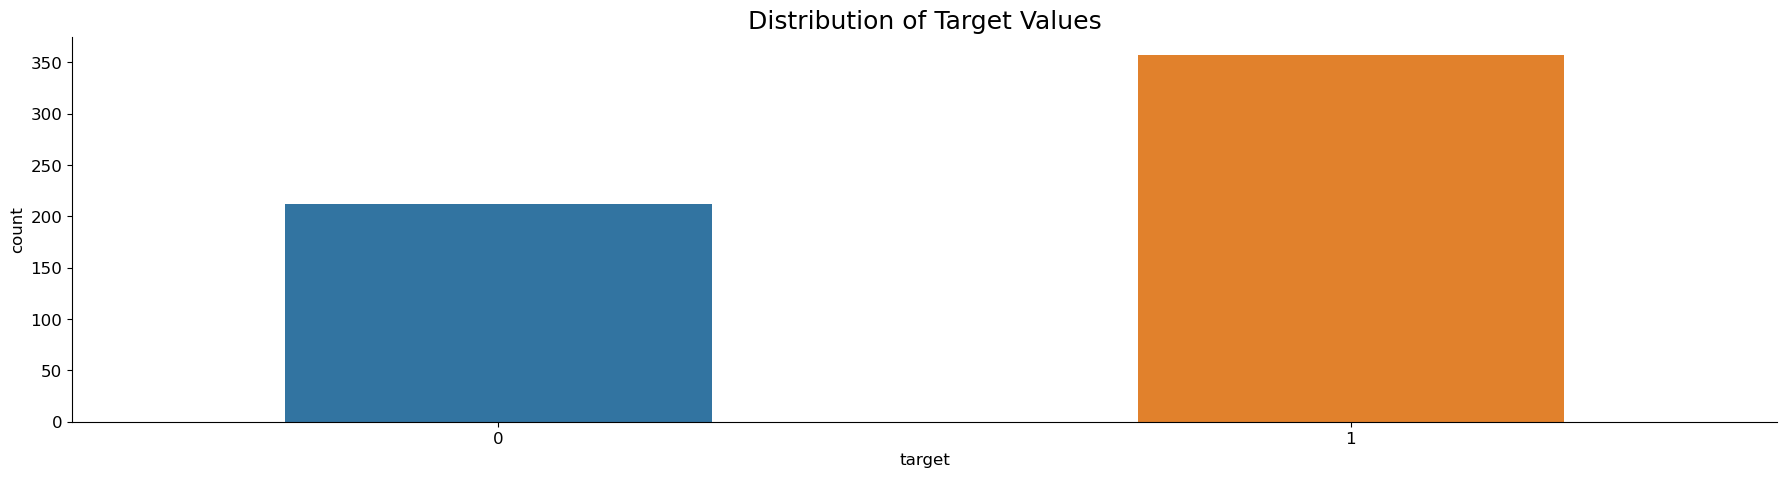

In [14]:
chart = sns.countplot(x= df["target"], width=0.5)

    
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Distribution of Target Values', fontsize=18)
#plt.xticks(rotation=45,
#          horizontalalignment="right",
#          fontweight="light",
#          fontsize="x-large")
plt.show()

What is the distribution of the independent feature values?

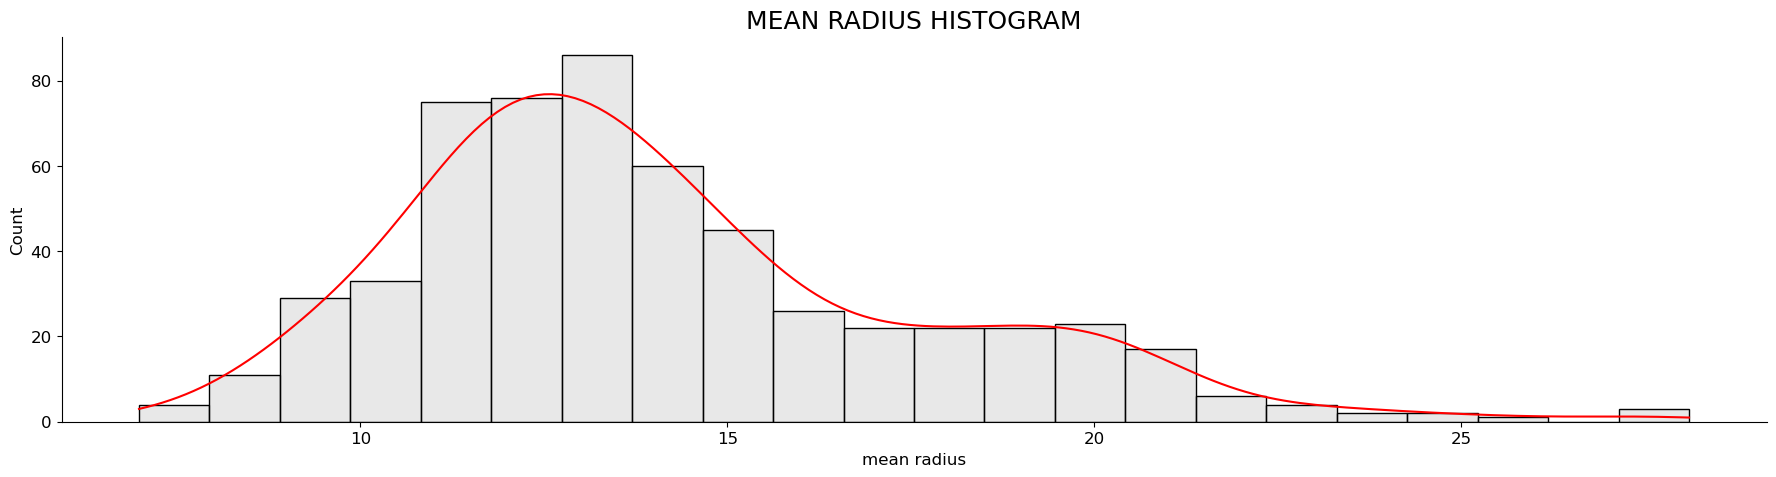

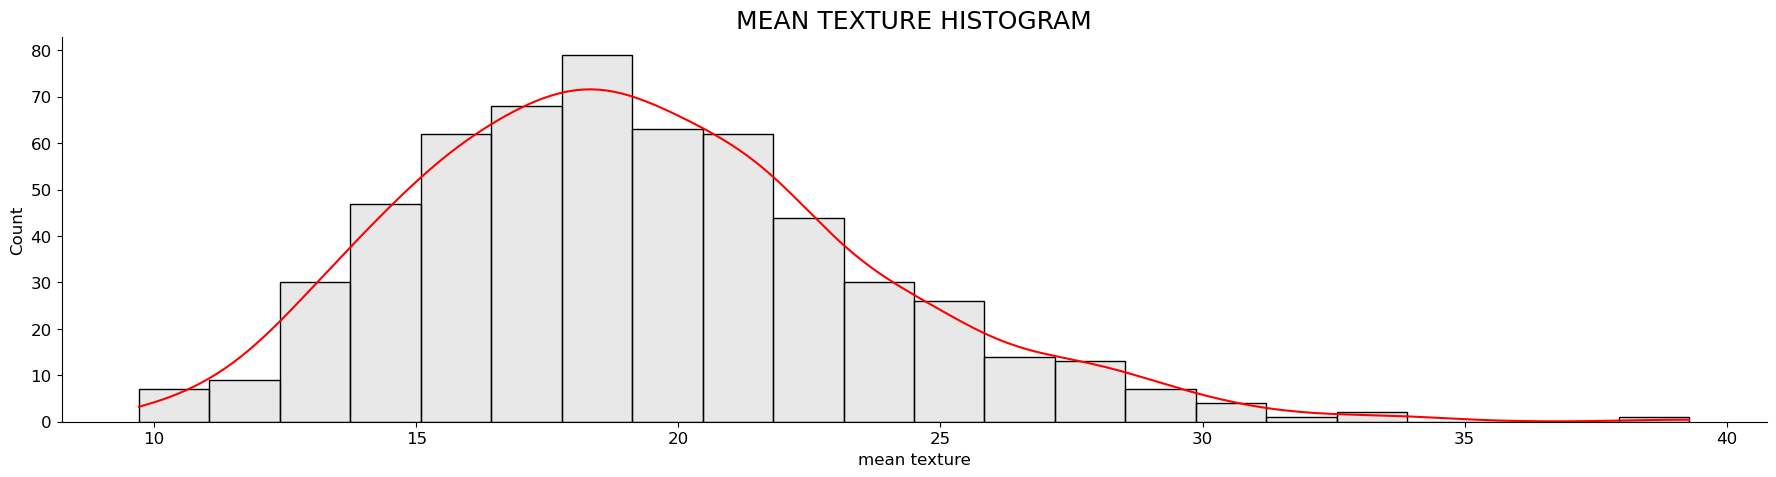

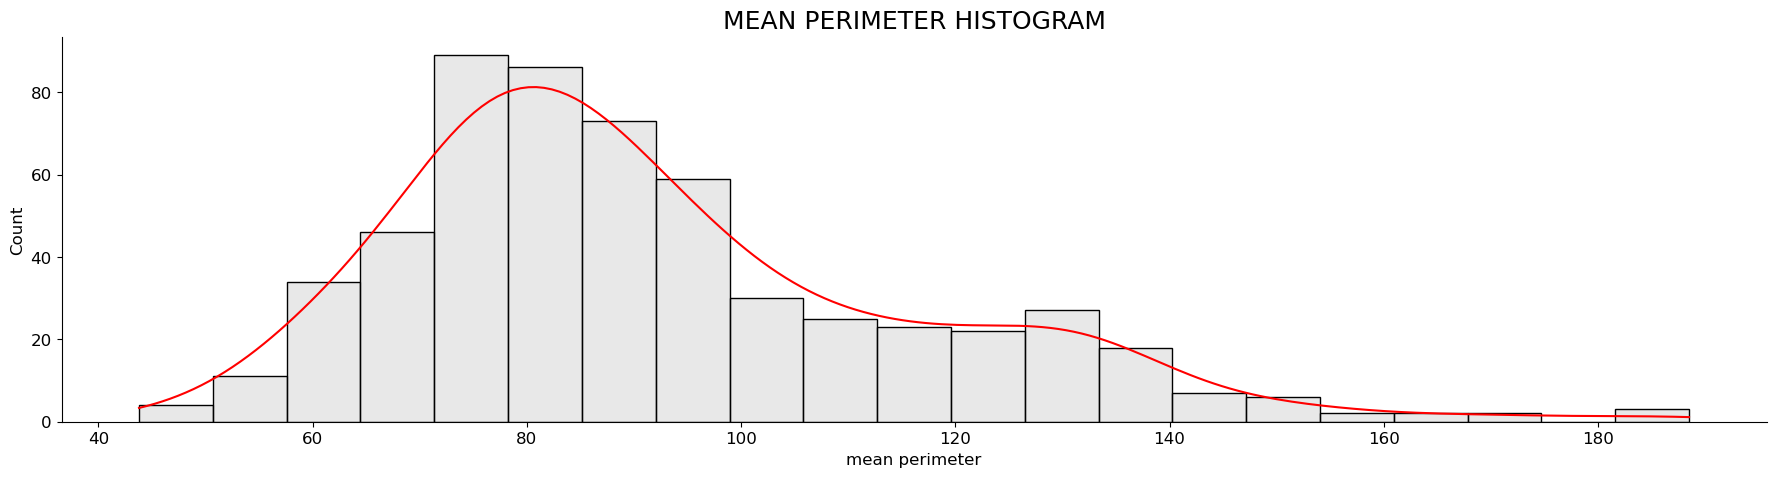

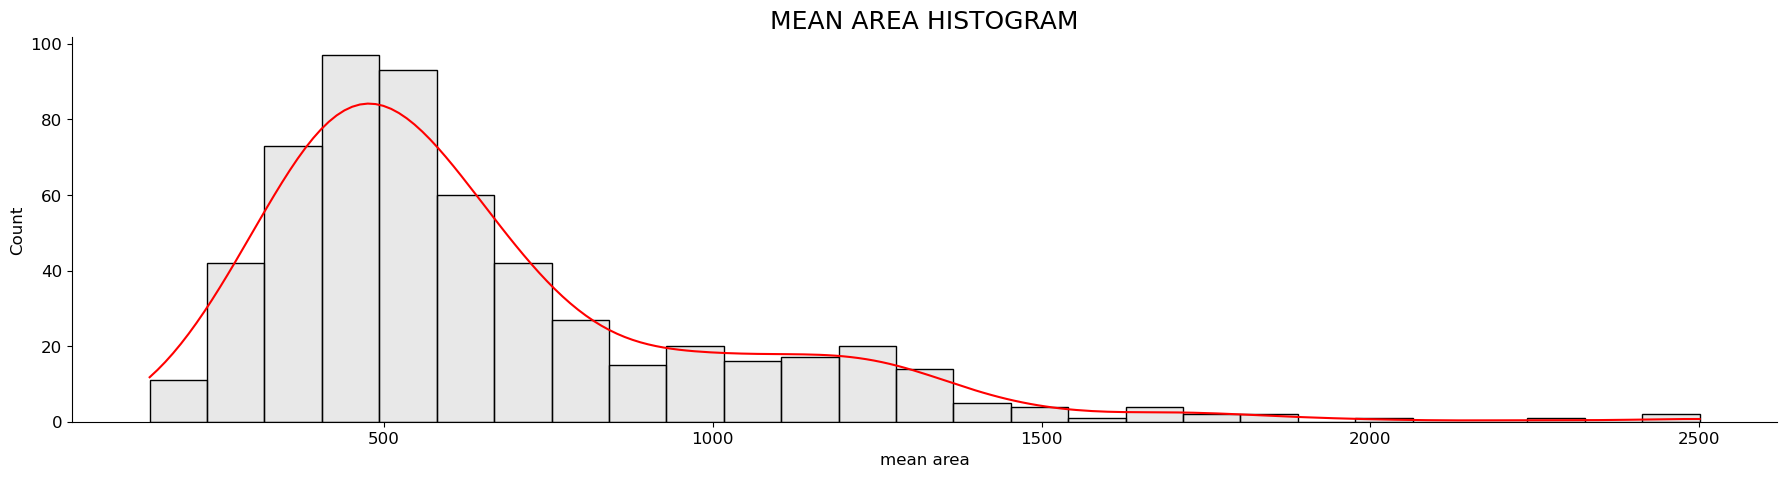

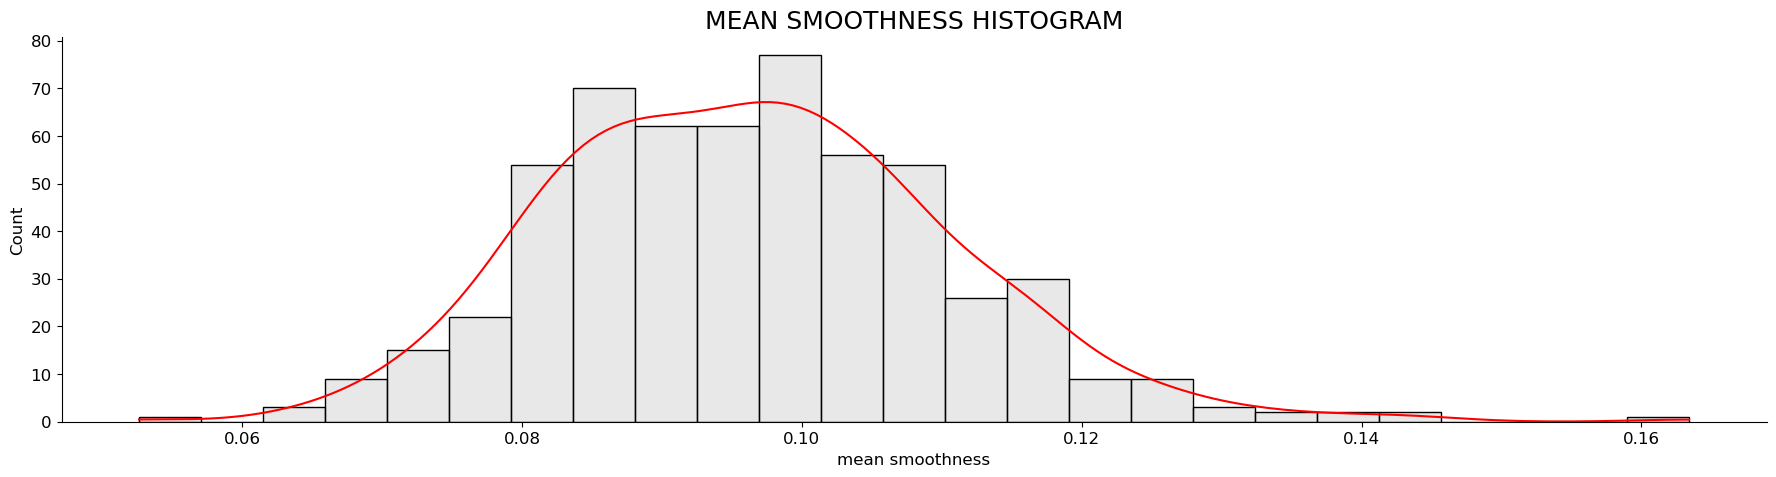

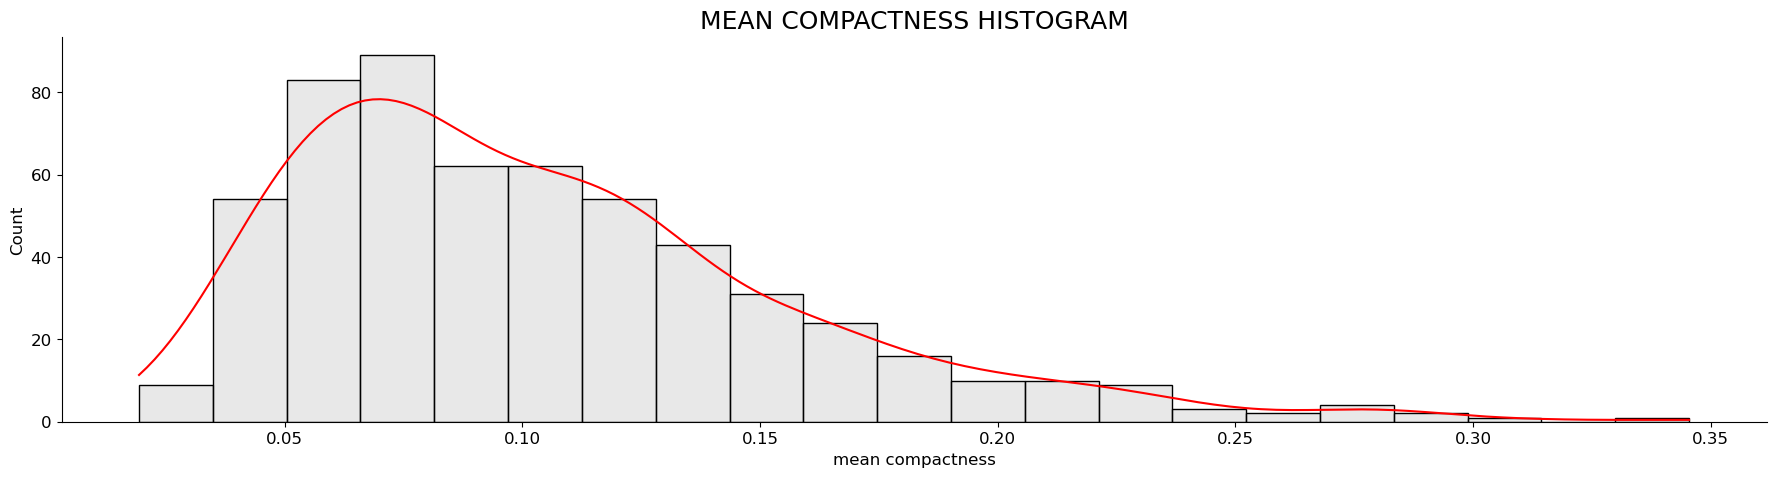

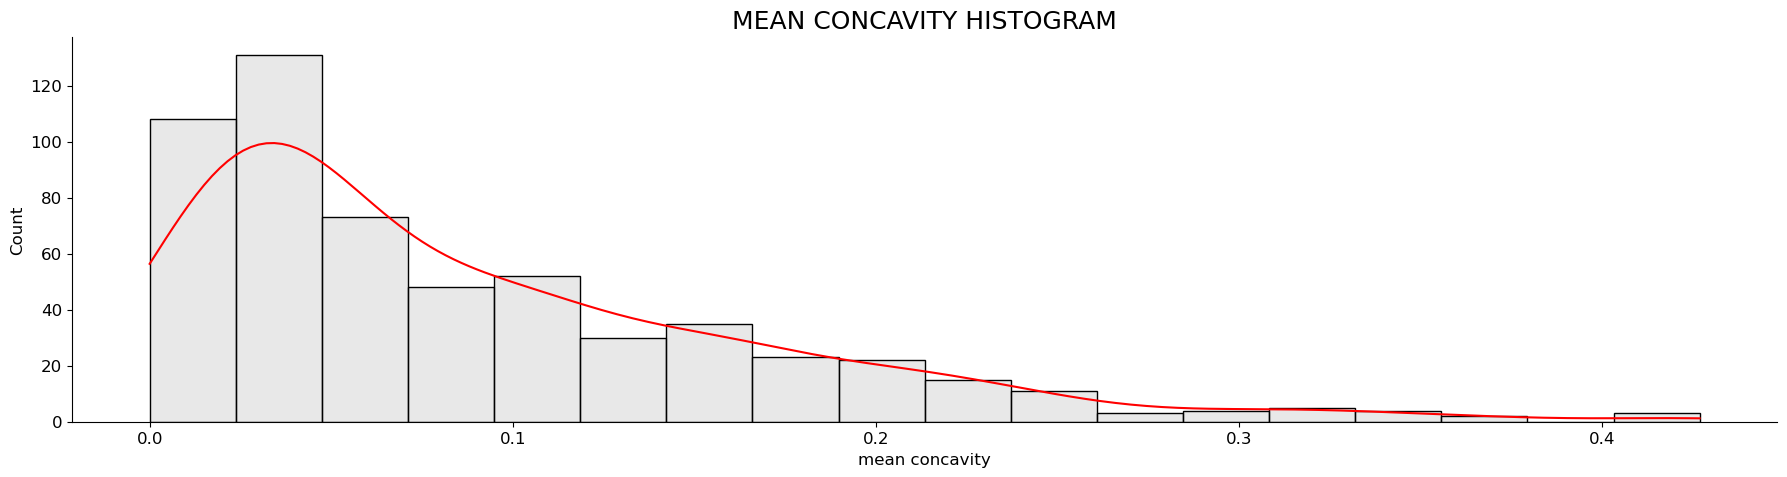

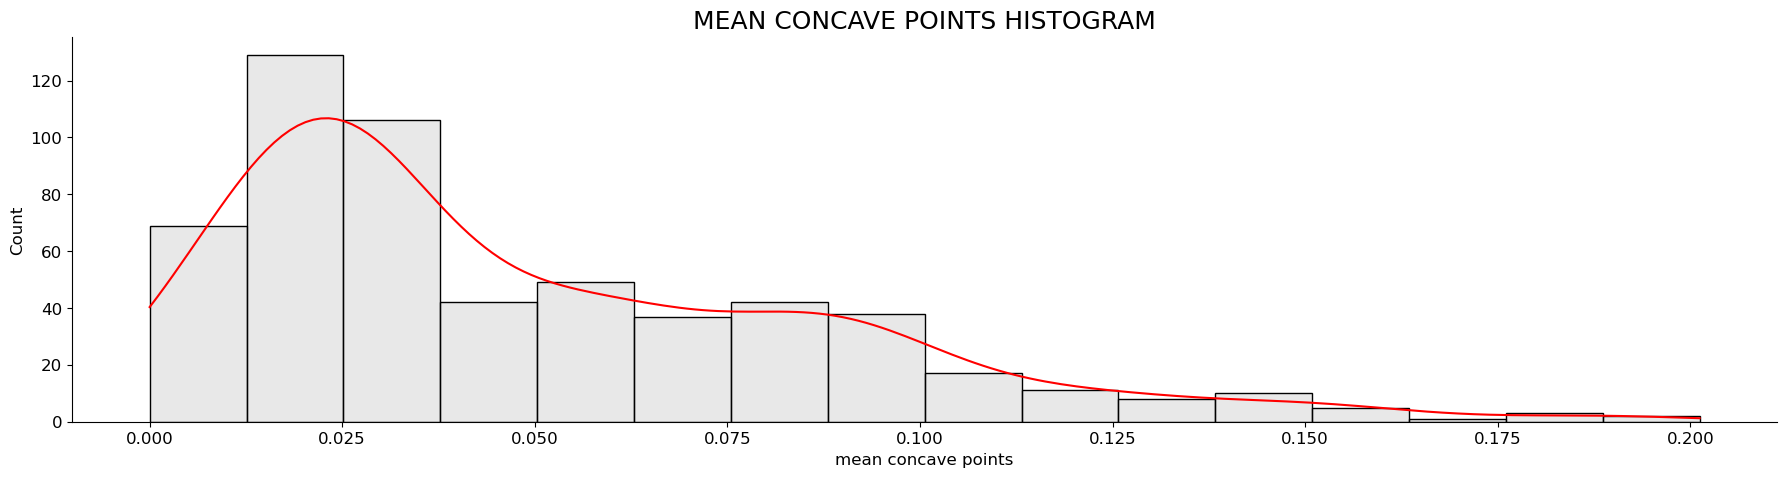

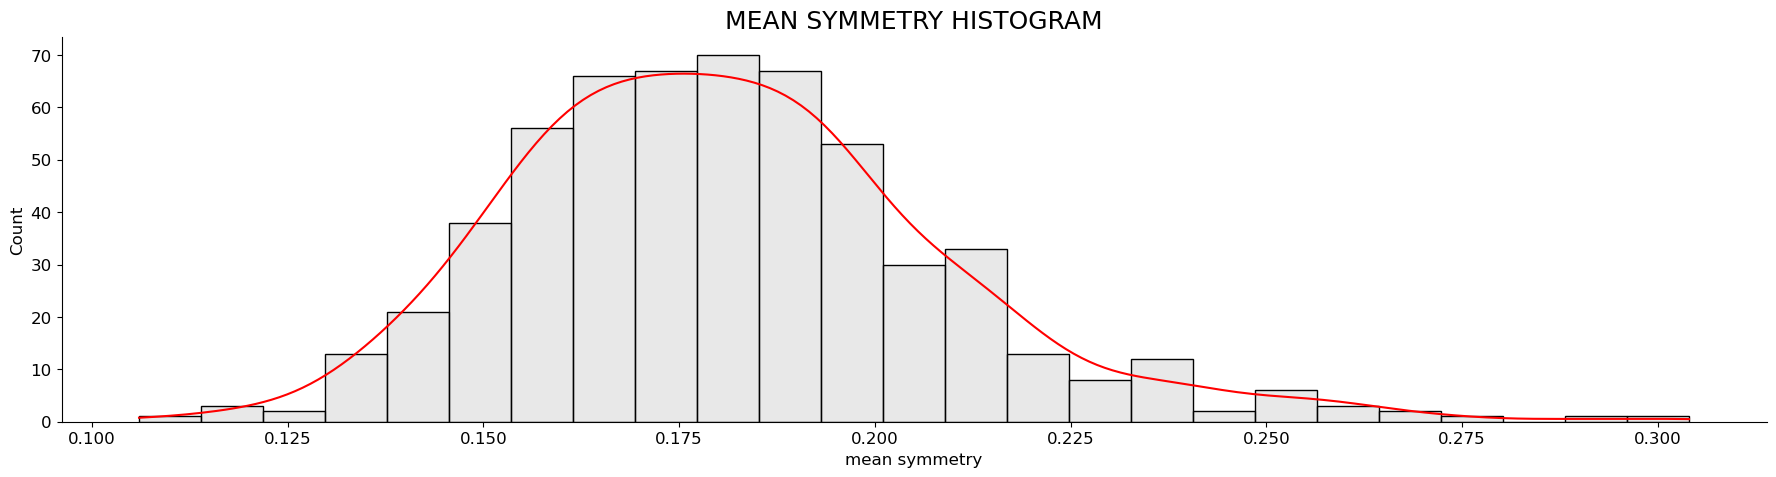

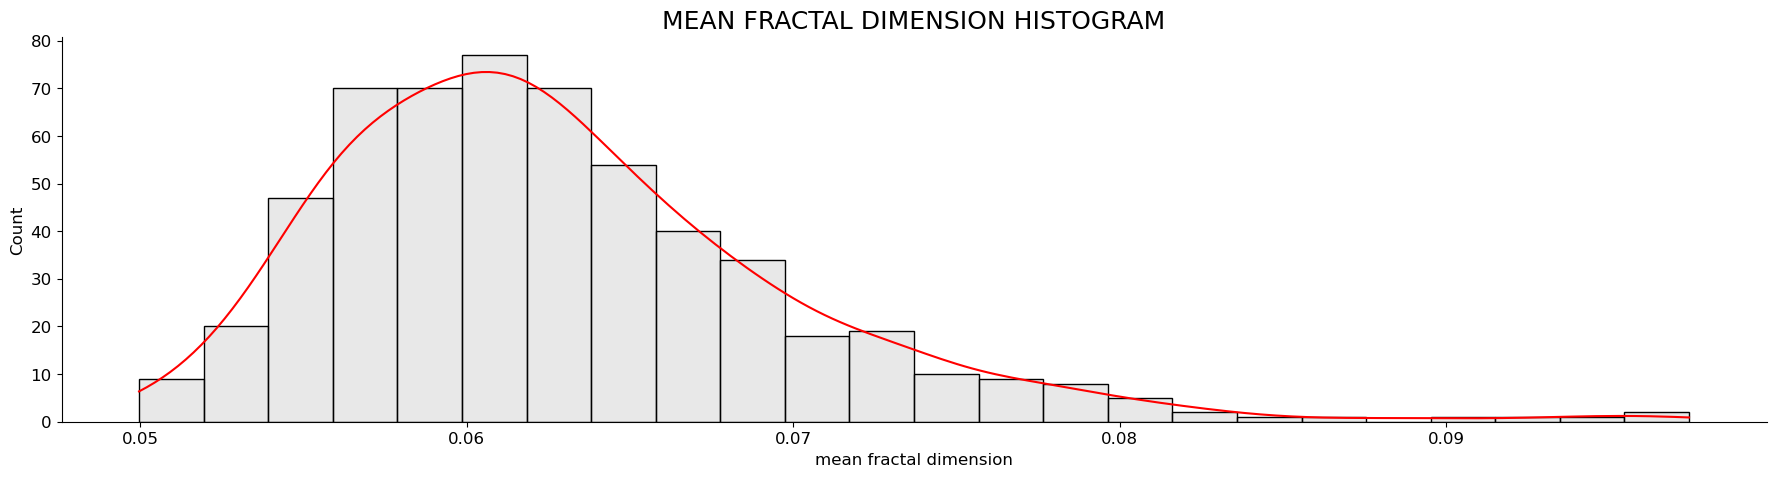

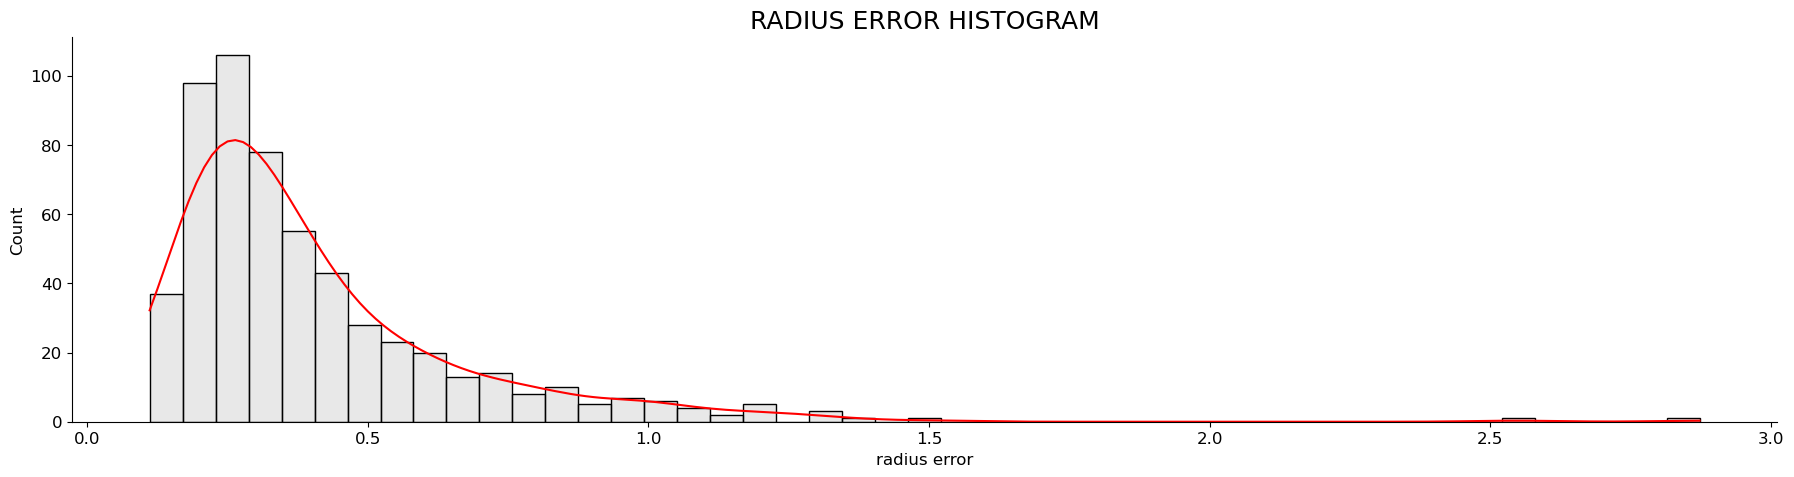

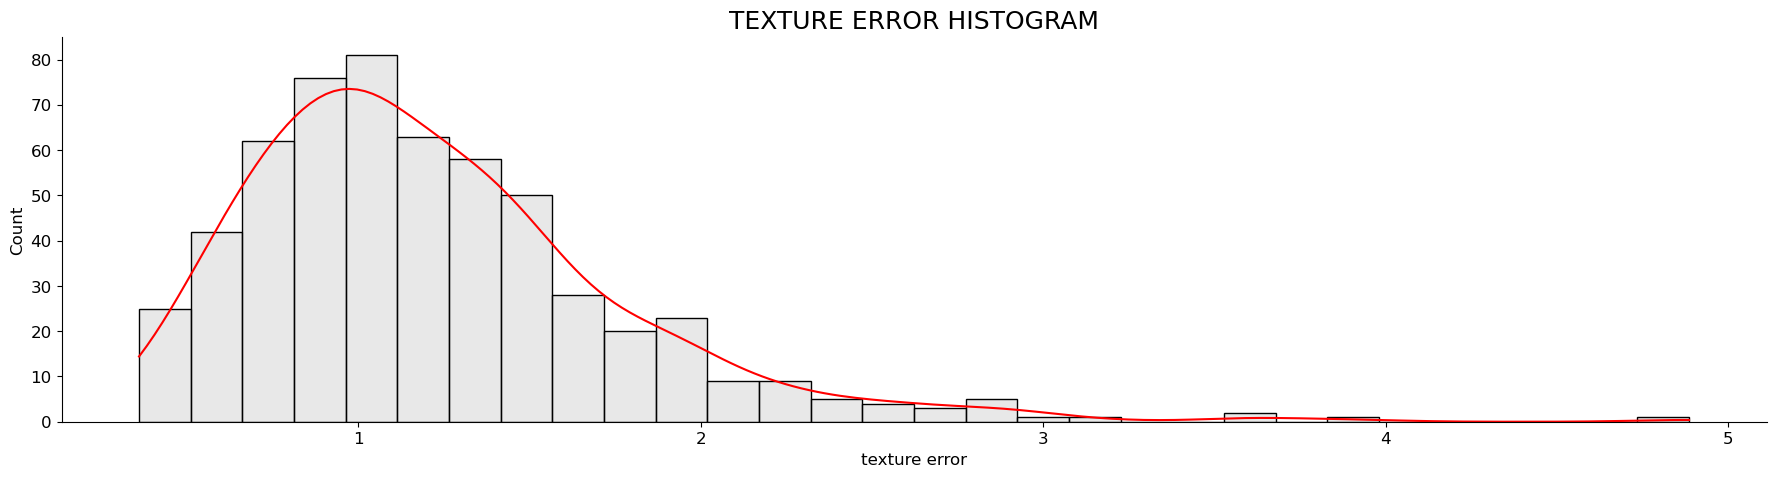

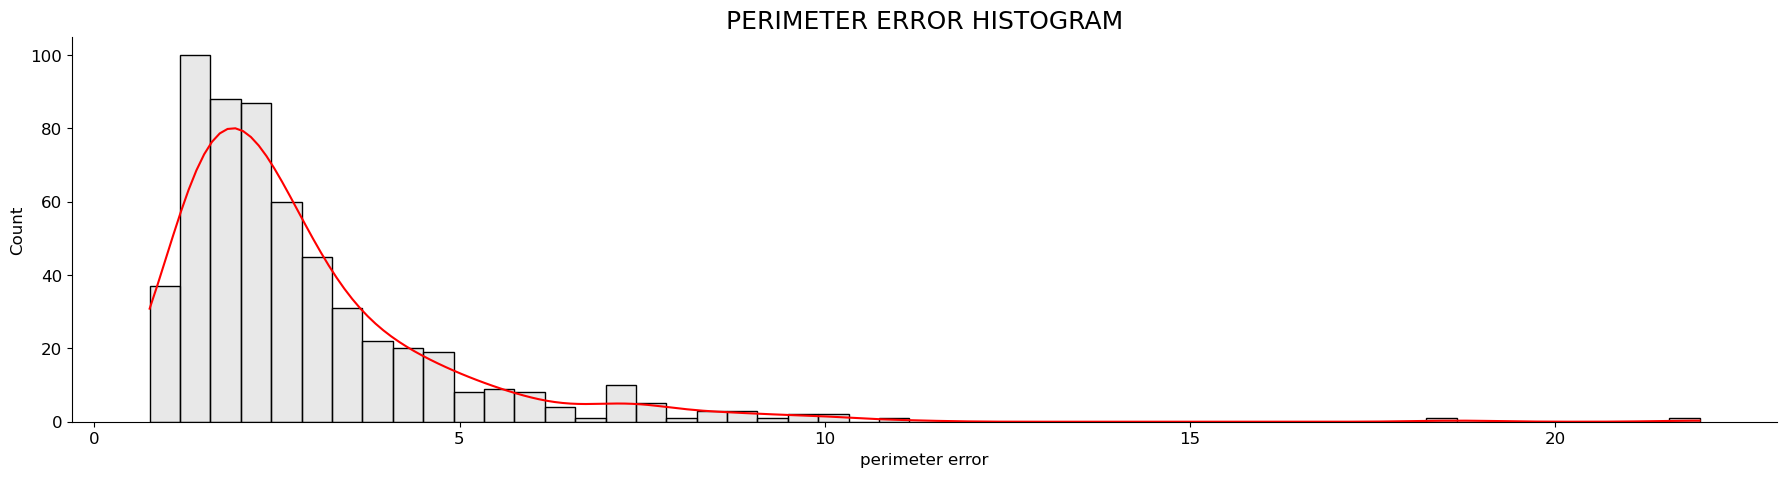

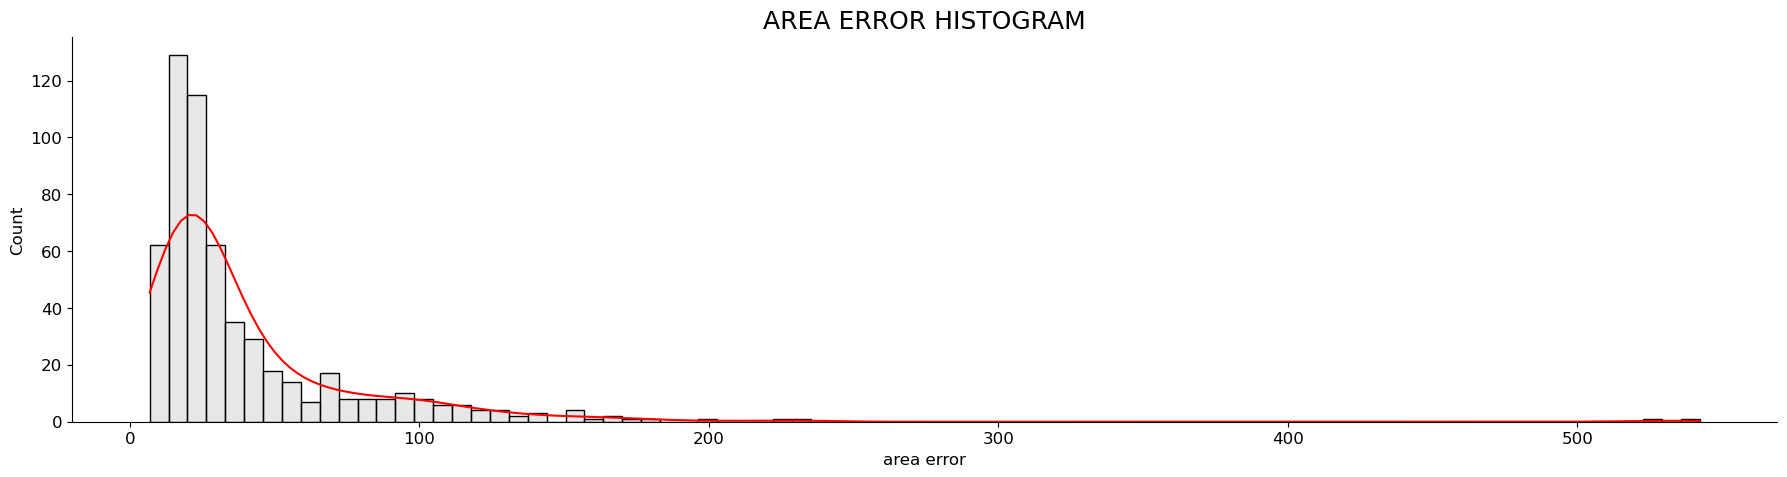

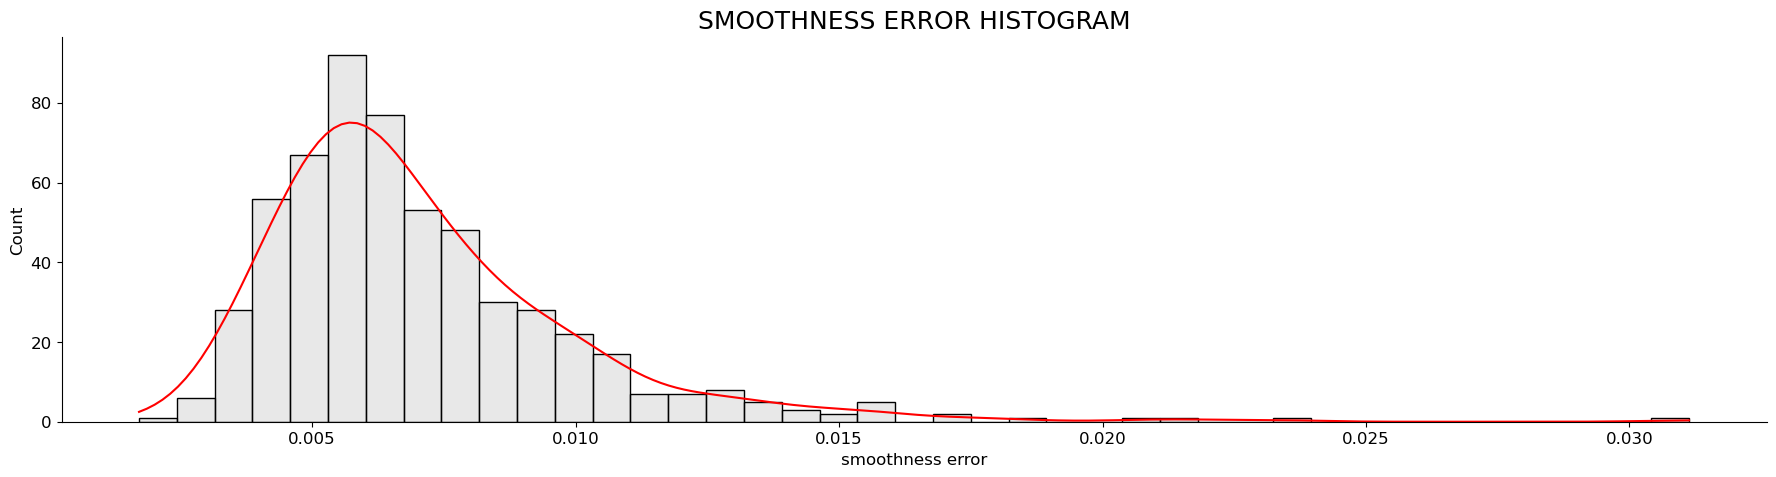

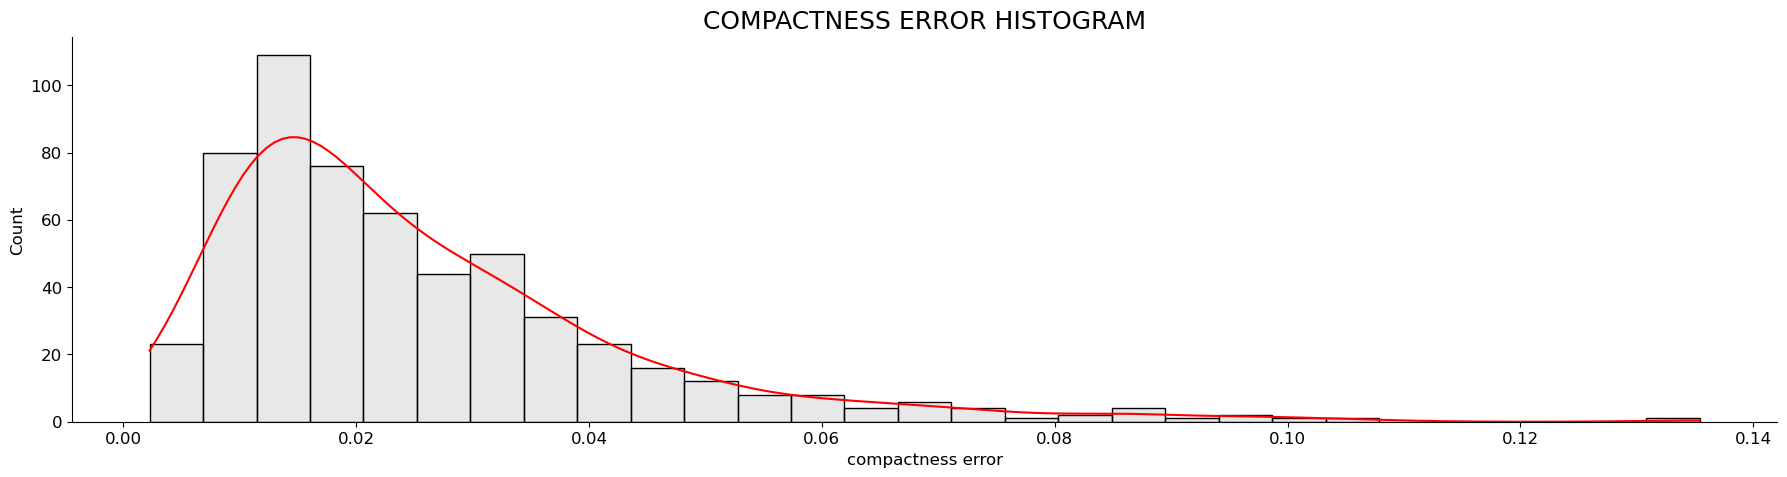

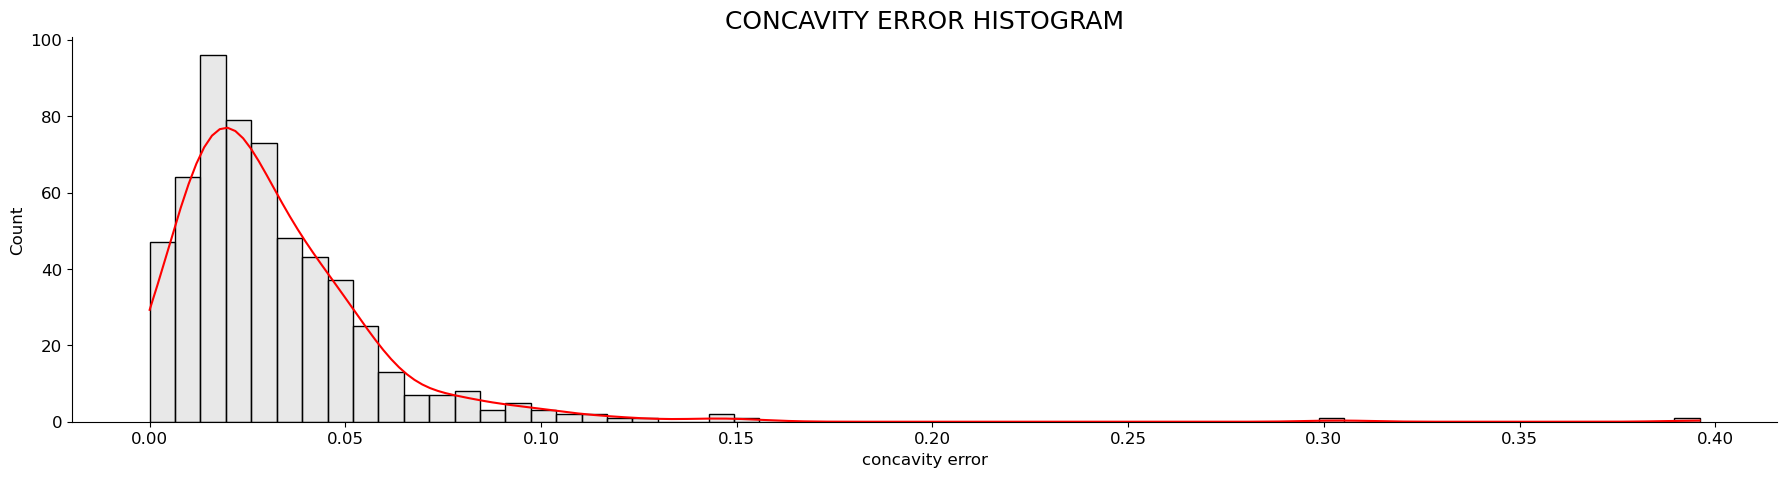

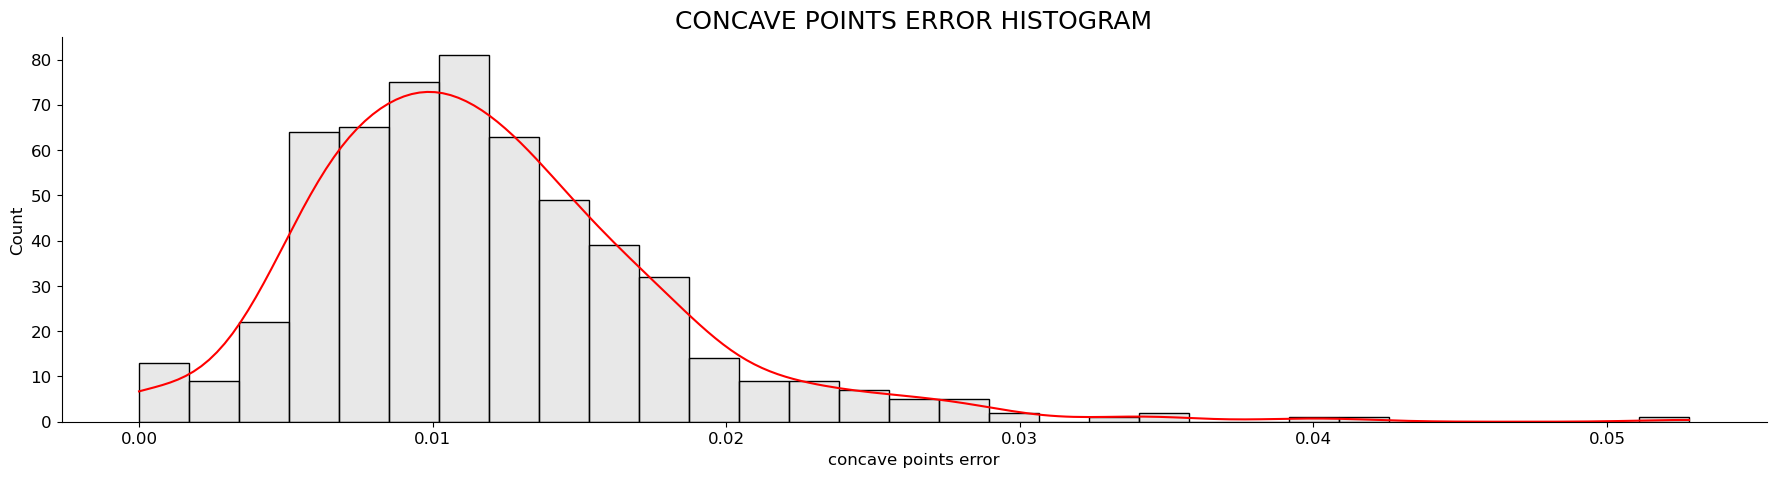

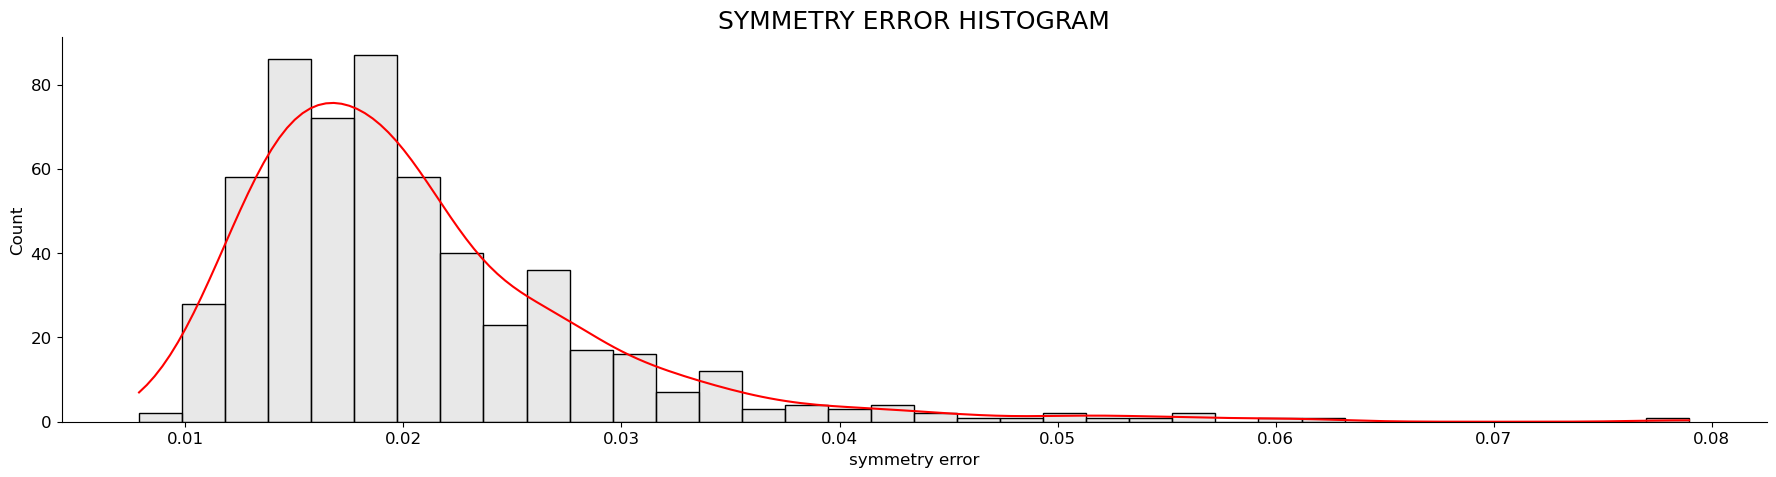

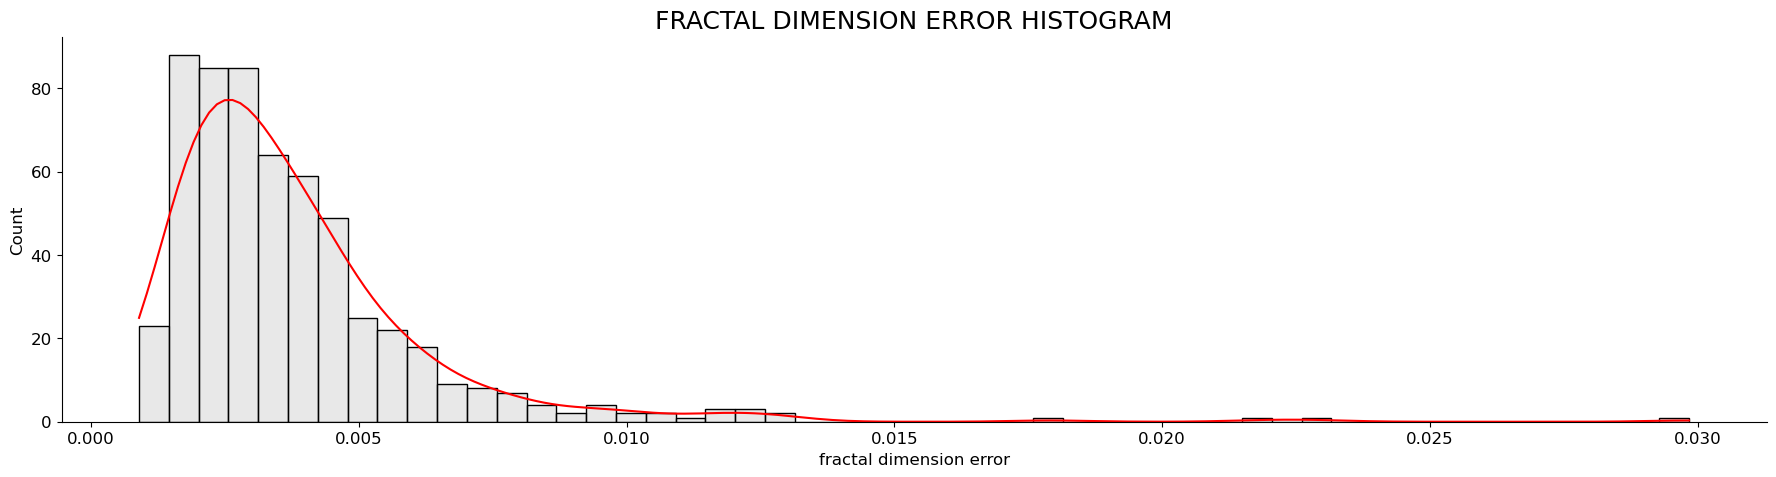

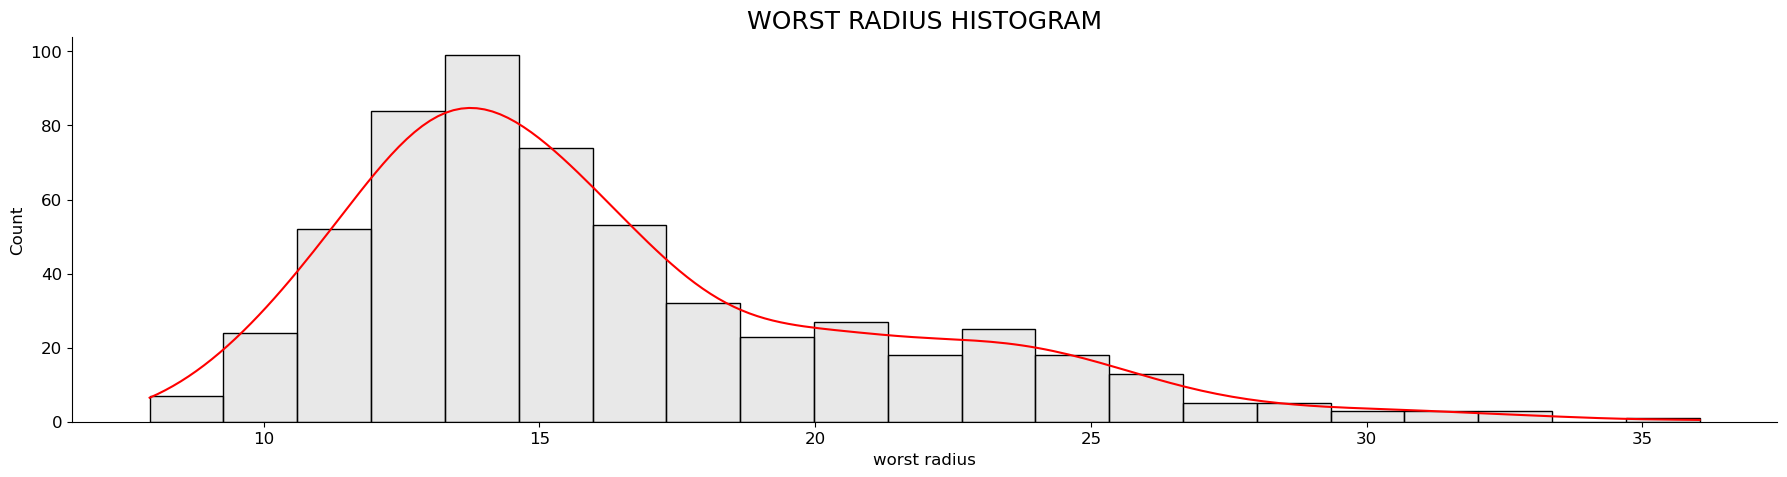

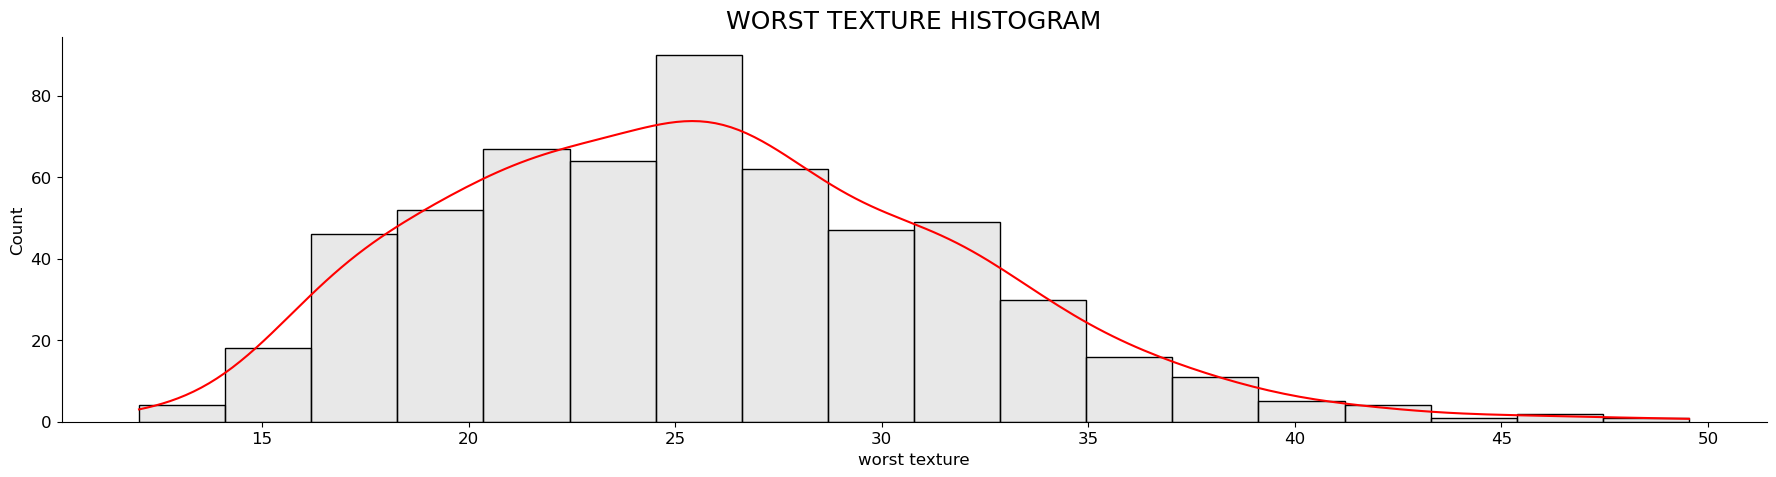

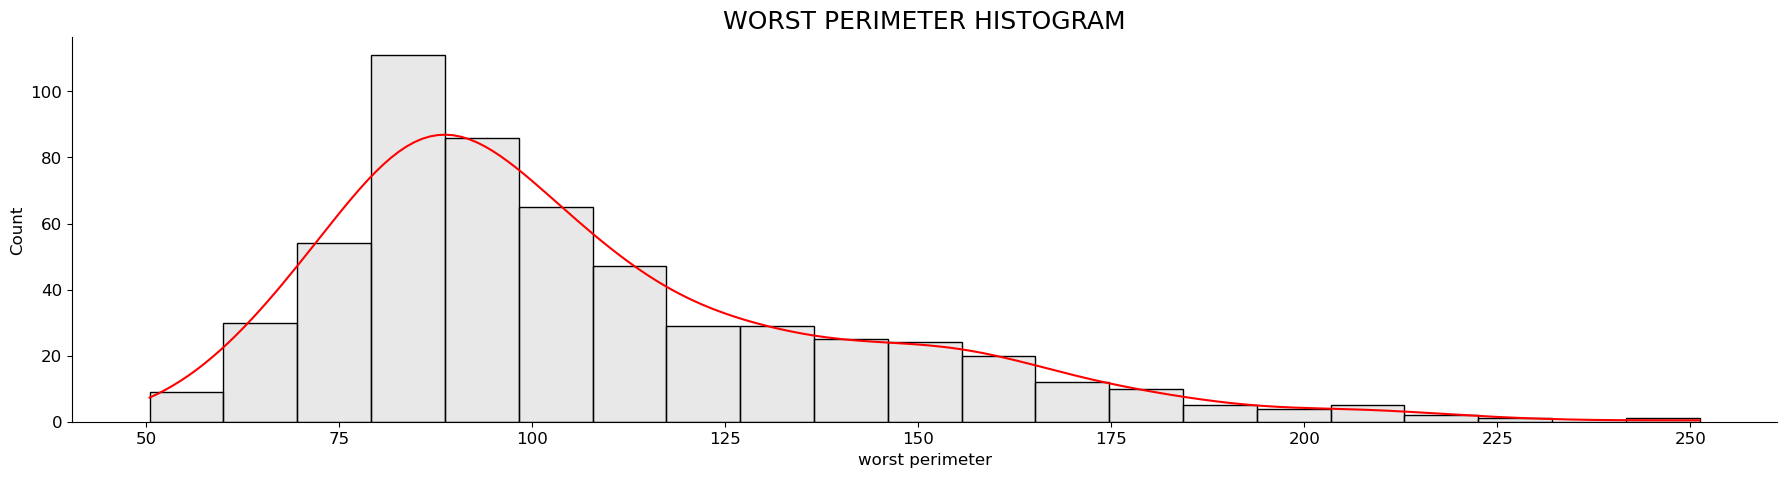

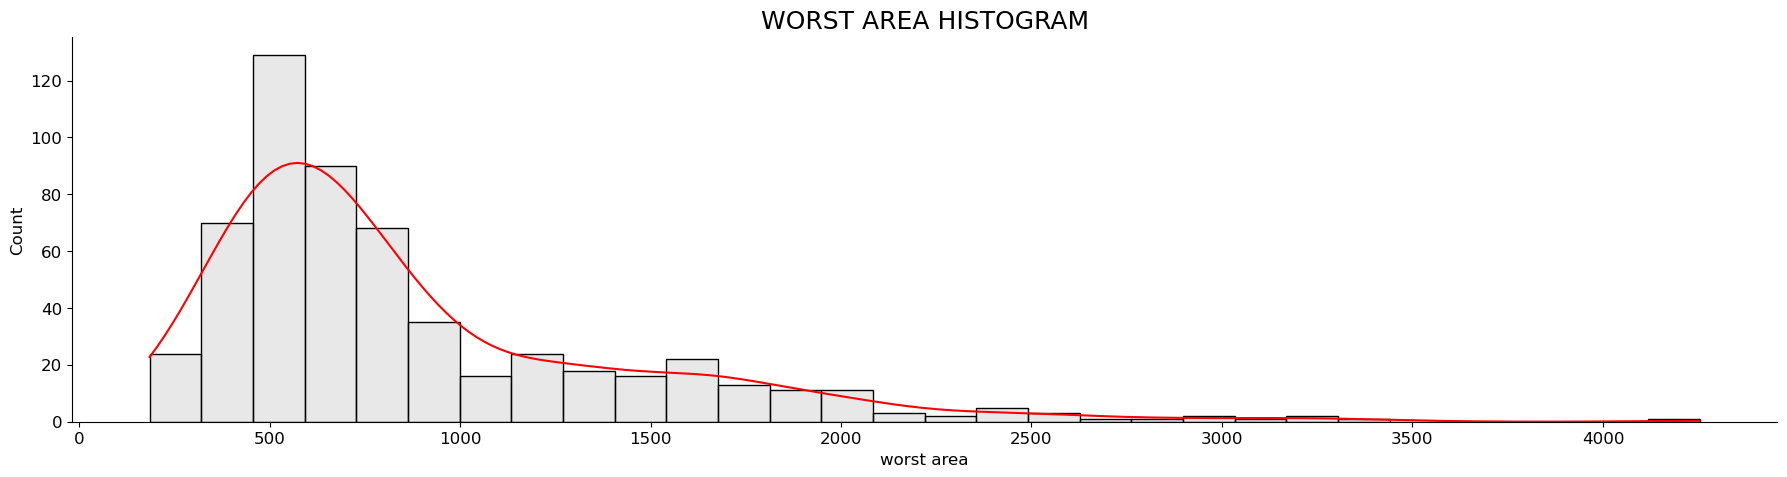

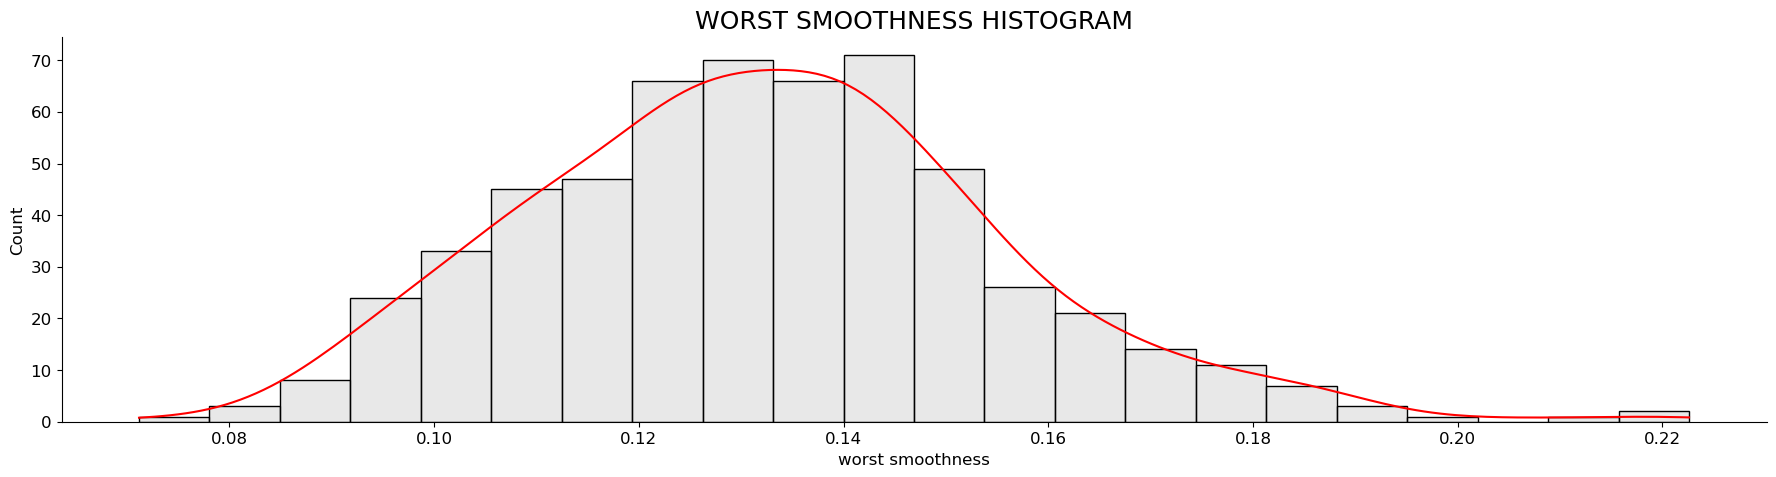

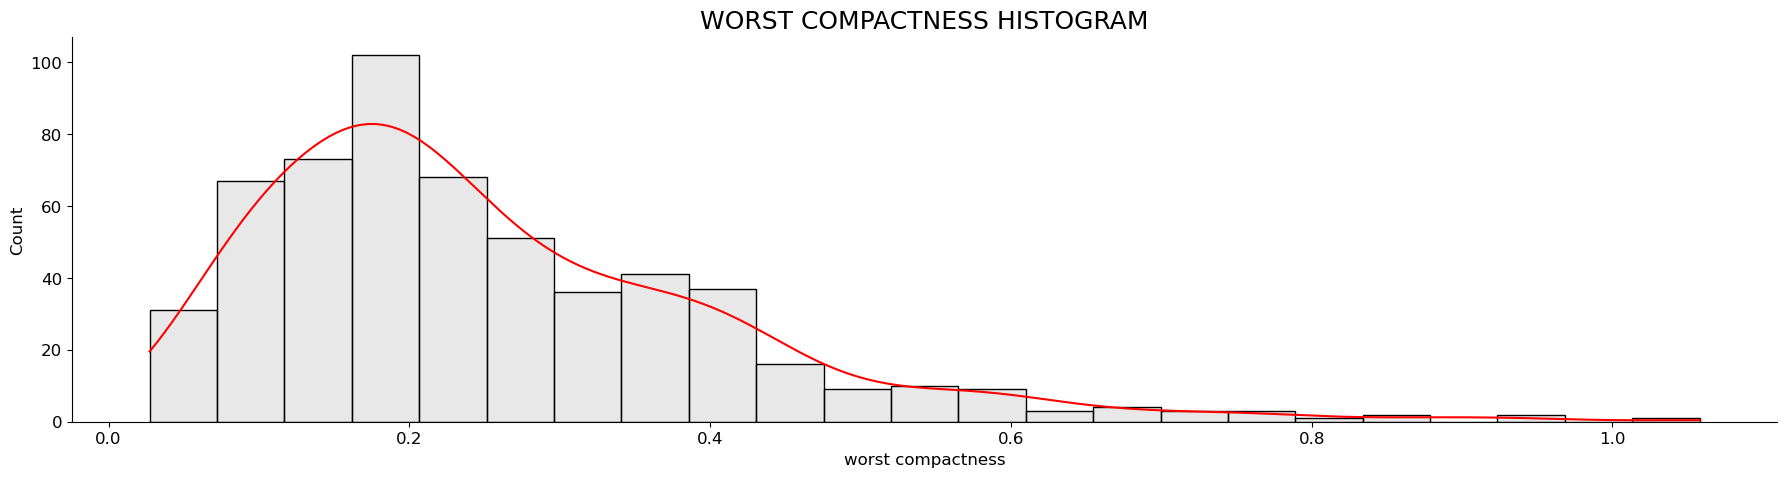

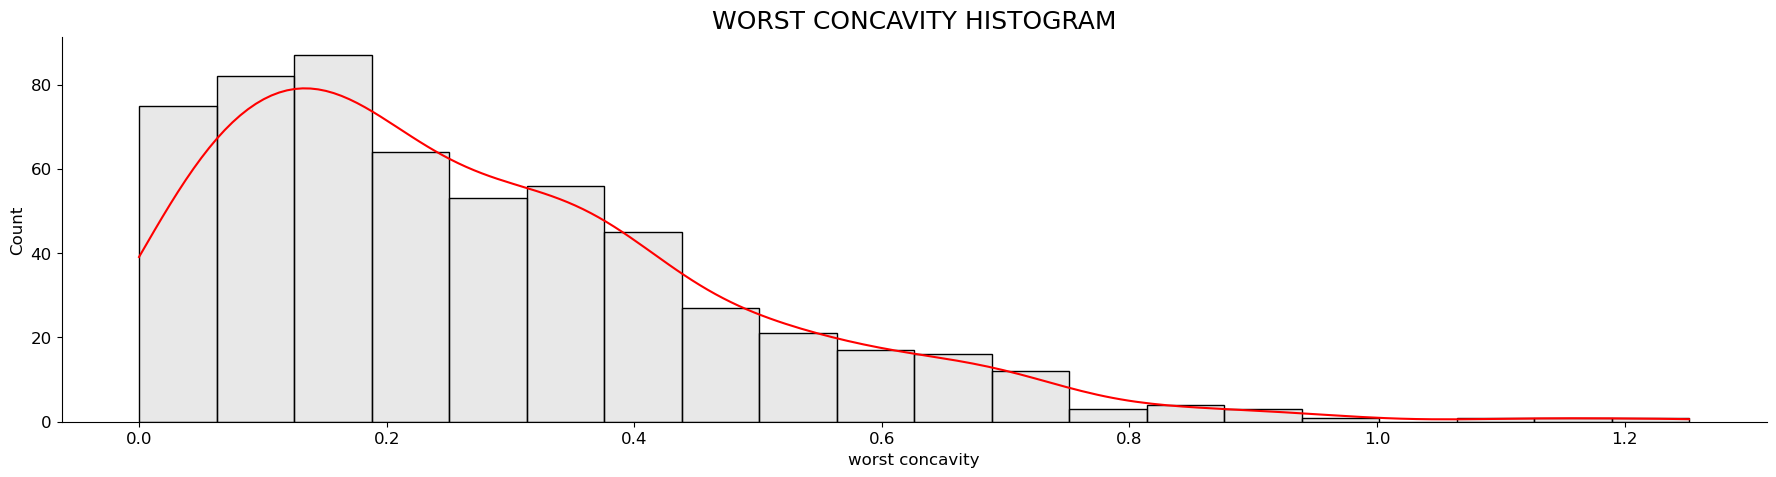

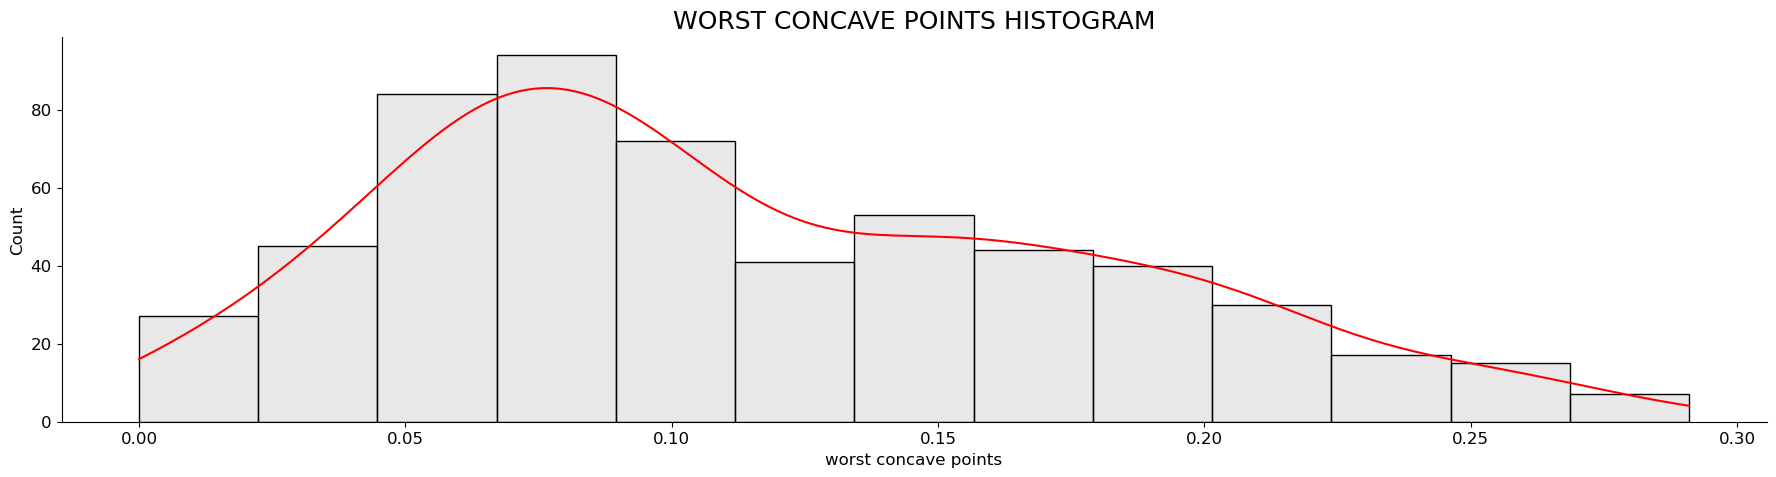

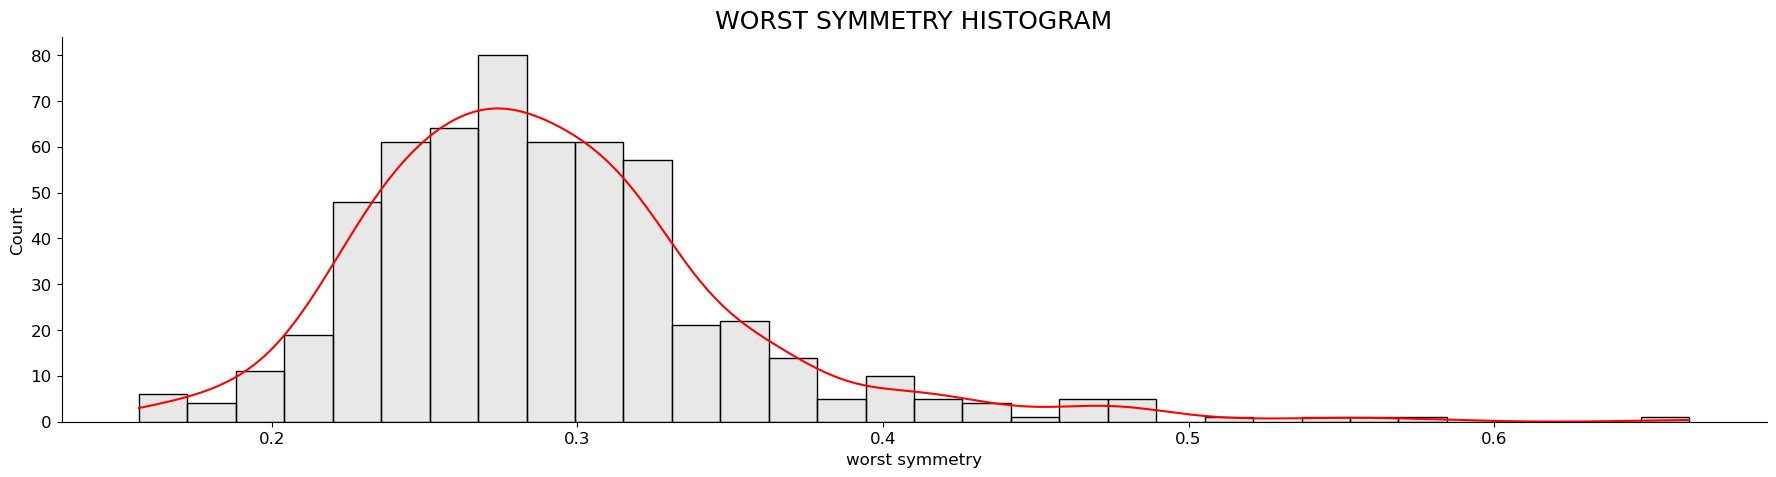

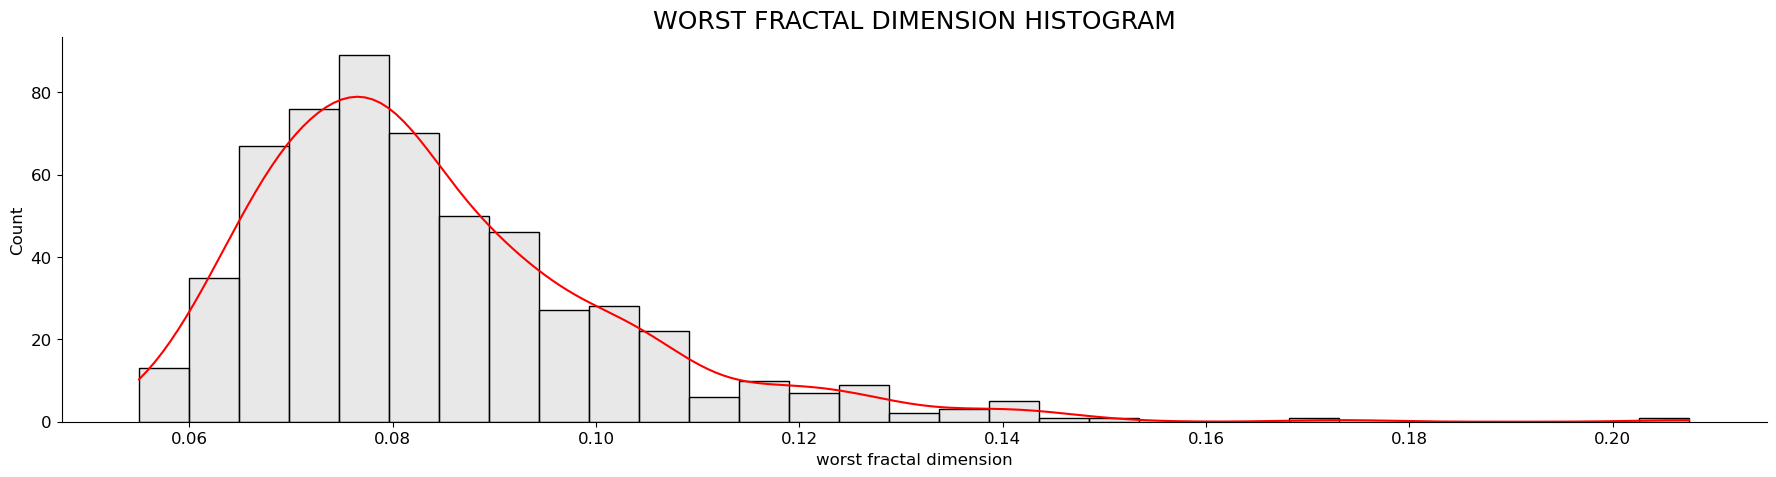

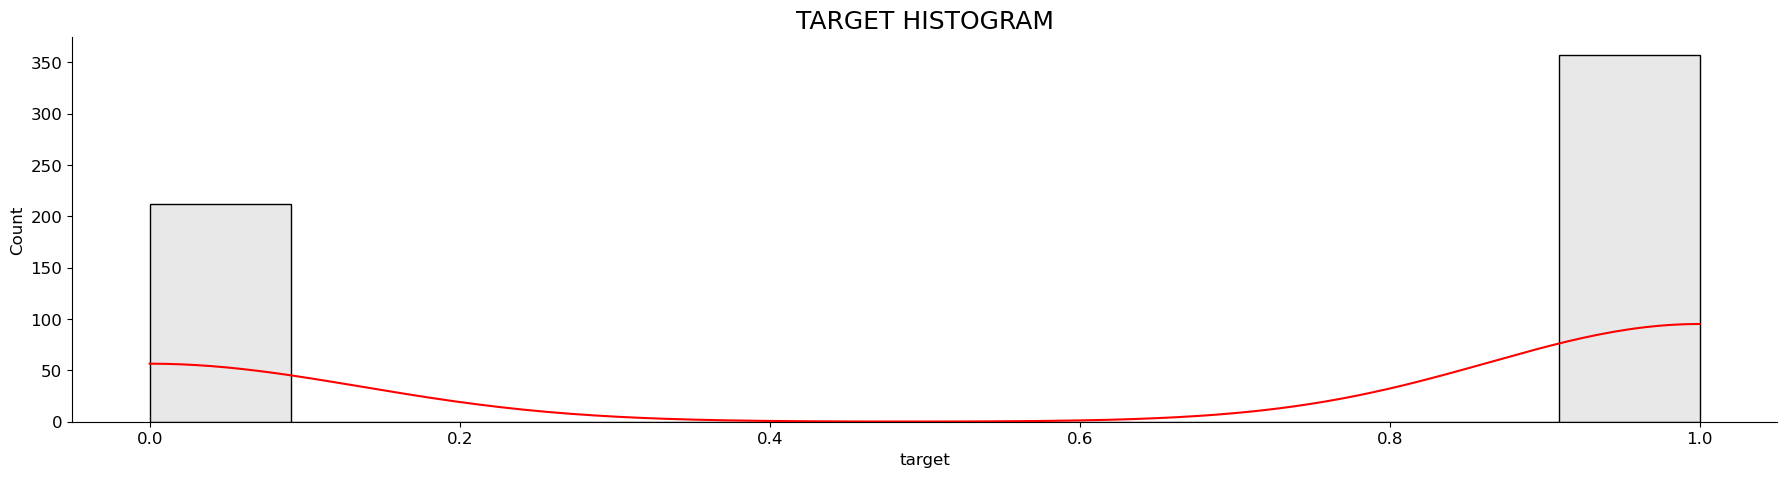

In [15]:
for i in df.columns:
    ax = sns.histplot(df, x=i, kde=True, color='lightgray')
    ax.lines[0].set_color('red')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.title(i.upper() + ' HISTOGRAM', fontsize=18)
    plt.show()

#### What is the spread of Mean Texture??
The texture is an important feature for image analysis techniques that are used to classify tumors and evaluate the presence of cancer. Texture analysis can be used to detect regions of high and low density in an image, which can help to identify the presence and type of tumor.

In [16]:
fig= px.scatter(df, 
                 x='mean texture', 
                 color='target',
                 size='mean texture',
                 #template='simple_white', 
                 title='Cancer Mean Texture Spread',
                 labels={"mean texture": "Mean Texture", "target":"Target"},
                template= "simple_white",
                 hover_data=["target"])

fig.update_layout(xaxis_title="Mean Texture",yaxis_title=" ")



fig_widget = go.FigureWidget(fig)
fig_widget



FigureWidget({
    'data': [{'customdata': array([[0],
                                   [0],
                                   [0],
                                   ...,
                                   [0],
                                   [0],
                                   [1]]),
              'hovertemplate': ('Mean Texture=%{marker.size}<br' ... '%{marker.color}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([0, 0, 0, ..., 0, 0, 1]),
                         'coloraxis': 'coloraxis',
                         'size': array([10.38, 17.77, 21.25, ..., 28.08, 29.33, 24.54]),
                         'sizemode': 'area',
                         'sizeref': 0.09820000000000001,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'h',
              'showlegend': False,
              'type': 'scatter',
              'uid': '91c75cd9-85ce-464f-b7e4-386ea

#### What is the spread of Mean Compactness??
Compactness is a measure of how densely packed the cells of a tumor are. It is an important factor in determining the prognosis of a cancer patient. Compactness is used to classify tumors into different types, such as solid or non-solid. Solid tumors tend to have higher compactness and can be more difficult to treat. Non-solid tumors tend to be less dense and can often be treated more easily.

In [17]:
fig = px.scatter(df,
                 x="symmetry error", 
                 size="mean compactness",
                 color="mean compactness",
                  labels={"mean compactness": "Mean Compactness"},
                 hover_data=["target"],
                 template='seaborn', 
                 title="Cancer Compactness Mean")
fig.update_layout(xaxis_title="Mean Compactness",yaxis_title=" ")

fig_widget = go.FigureWidget(fig)
fig_widget

FigureWidget({
    'data': [{'customdata': array([[0],
                                   [0],
                                   [0],
                                   ...,
                                   [0],
                                   [0],
                                   [1]]),
              'hovertemplate': ('symmetry error=%{x}<br>index=%' ... '{customdata[0]}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([0.2776 , 0.07864, 0.1599 , ..., 0.1023 , 0.277  , 0.04362]),
                         'coloraxis': 'coloraxis',
                         'size': array([0.2776 , 0.07864, 0.1599 , ..., 0.1023 , 0.277  , 0.04362]),
                         'sizemode': 'area',
                         'sizeref': 0.0008635,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'h',
              'showlegend': False,
              'type': 'scatter',
             

#### What is the spread of Symmetry Error??
Symmetry error is when there is an uneven or asymmetrical distribution of concave points across the tumor surface. This may indicate that the tumor is not benign, or not completely benign, but rather has malignant areas.

In [62]:
fig = px.scatter(df,
                 x="mean compactness", 
                 size="symmetry error",
                 color="symmetry error",
                labels={"symmetry error": "Symmetry Error"},
                 hover_data=["target"],
                 template='seaborn', 
                 title="Symmetry Error Spread")
fig.update_layout(xaxis_title="Symmetry Error",yaxis_title=" ")

fig_widget = go.FigureWidget(fig)
fig_widget


FigureWidget({
    'data': [{'customdata': array([[0],
                                   [0],
                                   [0],
                                   ...,
                                   [0],
                                   [0],
                                   [1]]),
              'hovertemplate': ('mean compactness=%{x}<br>index' ... '{customdata[0]}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([0.03003, 0.01389, 0.0225 , ..., 0.01318, 0.02324, 0.02676]),
                         'coloraxis': 'coloraxis',
                         'size': array([0.03003, 0.01389, 0.0225 , ..., 0.01318, 0.02324, 0.02676]),
                         'sizemode': 'area',
                         'sizeref': 0.000197375,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'h',
              'showlegend': False,
              'type': 'scatter',
           

#### What is the spread of Mean Concave Points??
Concave points refer to the indented areas that can sometimes appear on the surface of a tumor. They are seen on a mammogram or other imaging and can be an indicator of malignancy, or cancer.

In [19]:
fig = px.scatter(df,
                 x="mean concave points", 
                 size='mean concave points',
                 color="mean concave points", 
                 hover_data=["target"],
                 template="seaborn", 
                 labels={"mean concave points": "Mean Concave Points"},
                 title="Mean Concave Points Spread")
fig.update_layout(xaxis_title="Mean concave points",yaxis_title=" ")
fig_widget = go.FigureWidget(fig)
fig_widget

FigureWidget({
    'data': [{'customdata': array([[0],
                                   [0],
                                   [0],
                                   ...,
                                   [0],
                                   [0],
                                   [1]]),
              'hovertemplate': ('Mean Concave Points=%{marker.c' ... '{customdata[0]}<extra></extra>'),
              'legendgroup': '',
              'marker': {'color': array([0.1471 , 0.07017, 0.1279 , ..., 0.05302, 0.152  , 0.     ]),
                         'coloraxis': 'coloraxis',
                         'size': array([0.1471 , 0.07017, 0.1279 , ..., 0.05302, 0.152  , 0.     ]),
                         'sizemode': 'area',
                         'sizeref': 0.000503,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'h',
              'showlegend': False,
              'type': 'scatter',
              

Correlation in machine learning context is a measure of the strength of a linear relationship between two variables. It is used to assess how well a model performs in predicting a response variable from an explanatory variable.

It can also help identify possible sources of bias and other errors in a model. Let us now take a look at the correlation between the independent features using a heatmap.

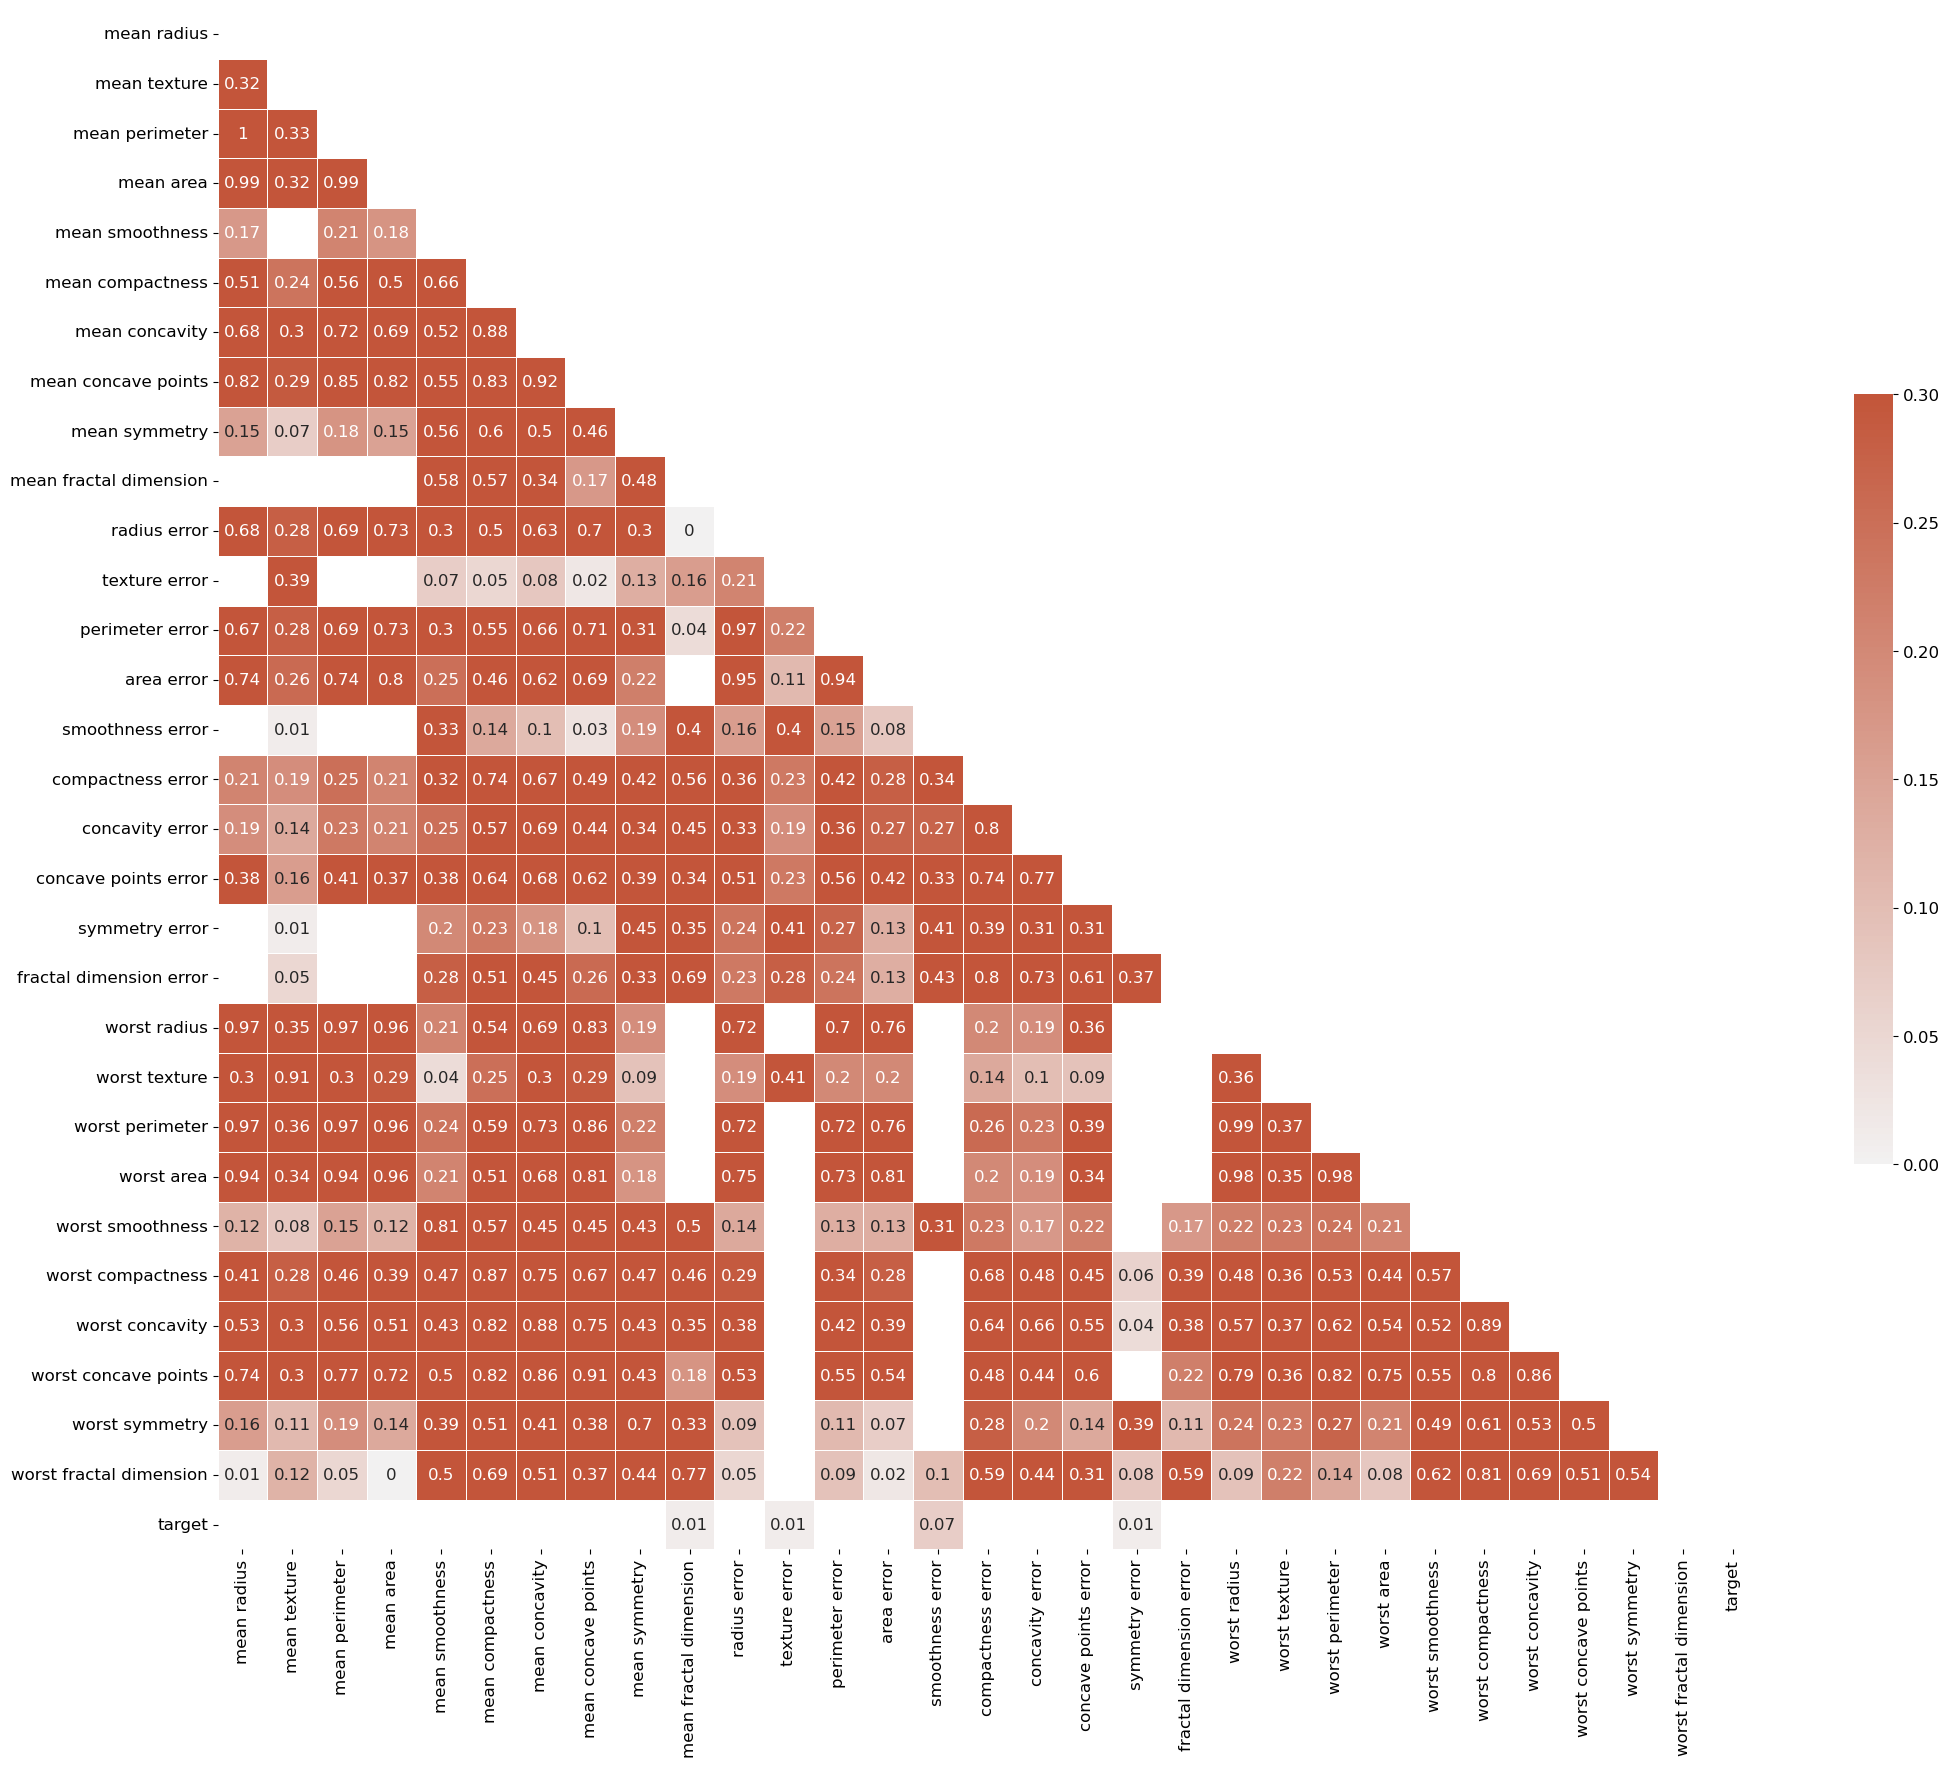

In [20]:
#Correlation Heatmap showing only those values that have a positive correlation
corr = df.corr()
corr = np.around(corr[corr > 0.0],2)                #filters out any negative correlation
mask = np.triu(np.ones_like(corr, dtype=bool))      #Gets rid of the other triange in the heatmap
f, ax = plt.subplots(figsize=(25,20))               
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()


### Data Pre-Processing

Helps improve the accuracy and performance of the machine learning algorithm.

In [21]:
#Remove target column and crease a variable with only target
input_columns = df.columns[:-1]
input_columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [22]:
target_column= df.columns[-1]
target_column

'target'

In [23]:
#Convert them to df
df_inputs=df[list(input_columns)].copy()
df_inputs

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [24]:
df_targets=df[(target_column)]
df_targets

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

### Data Scalling
Normalization and Standardization are the two main methods for the scaling of the data. Which are widely used in the algorithms where scaling is required. Both of them can be implemented by the scikit-learn libraries preprocess package.

Since we have a high dimensionality data, scaling the data will help us with the Principal Component Analysis which we will take a look at next.

In [25]:
scaler = MinMaxScaler()
scaler.fit(df_inputs[input_columns])
df_inputs[input_columns] = scaler.transform(df_inputs[input_columns])
df_inputs[input_columns].head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


### Apply the Principa Component Analysis

PCA is a way to reduce the number of variables while maintaining the majority of the important information. It transforms a number of variables that may be correlated into a smaller number of uncorrelated variables, known as principal components.

The main objective of PCA is to simplify your model features into fewer components to help visualize patterns in your data and to help your model run faster. Using PCA also reduces the chance of overfitting your model by eliminating features with high correlation.


An eigenvector (eigen is German for "typical"; we could translate eigenvector to "characteristic vector") is a special vector  𝑣
  such that when it is transformed by some matrix (let's say  𝐴
 ), the product has the exact same direction as  𝑣
 . An eigenvalue is a scalar (traditionally represented as  𝑙𝑎𝑚𝑏𝑑𝑎
 ) that simply scales the eigenvector  𝑣
  such that the following equation is satisfied:
  
  
𝐴𝑣=𝑙𝑎𝑚𝑏𝑑𝑎∗𝑣

In [26]:
#Extracting input values
column_values = []
for i in range(len(df_inputs.columns)):
    column_values.append(df_inputs.iloc[:,i].values)
    
#Making Covariance Matrix
covariance_matrix = np.cov(column_values)

#Getting the EigenVectors and the EigenValues
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [27]:
#First Element of the Covariance Matrix
covariance_matrix[0]

array([ 0.027818  ,  0.00785484,  0.02794603,  0.02458229,  0.00361231,
        0.01367458,  0.02108345,  0.02645754,  0.00341174, -0.00772894,
        0.01137405, -0.00197887,  0.01071215,  0.01042819, -0.00378944,
        0.00462112,  0.00246906,  0.0073333 , -0.00202383, -0.00065016,
        0.02780391,  0.00811481,  0.02693902,  0.02196388,  0.0030081 ,
        0.0105267 ,  0.01464405,  0.028038  ,  0.00333488,  0.00013961])

In [28]:
#First Eigenvector
eigen_vectors[0]

array([-2.42675774e-01, -2.61316697e-01, -5.95222384e-02,  3.94334569e-02,
       -5.88423544e-04,  2.07022394e-02,  2.42488690e-03, -4.38845905e-02,
        9.75085975e-02,  2.22769562e-01, -8.31524671e-02, -1.19734434e-01,
       -3.89565406e-02, -1.07972318e-01,  1.93030259e-01, -7.30164853e-02,
        2.97307938e-01, -1.47147813e-02,  3.38169231e-02, -4.54114194e-02,
        6.29772186e-02, -1.38267325e-01, -7.05072198e-01, -1.96766318e-01,
       -1.47132741e-01, -1.30574879e-01,  1.54107718e-01, -9.73681525e-02,
        5.86339157e-02, -5.57071438e-02])

In [29]:
print('The first eigen value is',round(eigen_values[0],4))

The first eigen value is 0.3313


Explained variance is a measure of how much of the total variance in a dataset can be explained by a particular model. It is a measure used to evaluate how well a model fits the data. It is calculated by taking the ratio of the variance explained by the model to the total variance of the data. A higher explained variance indicates that the model is capturing more of the underlying structure of the data.



In [30]:
explained_variance = []
c= 0
for i in range(len((eigen_values/(np.sum(eigen_values))*100))): 
    c = c + np.around((eigen_values[i]/(np.sum(eigen_values))*100),3)
    while c < 92:
        explained_variance.append(c)
        print('At', i,'PC,', 'Explained Variance is',c)
        break

At 0 PC, Explained Variance is 53.098
At 1 PC, Explained Variance is 70.381
At 2 PC, Explained Variance is 77.495
At 3 PC, Explained Variance is 83.906
At 4 PC, Explained Variance is 87.992
At 5 PC, Explained Variance is 91.063


In [31]:
print('We have been able to achieve the', np.around(explained_variance[-1],4), 
      'variance with just first', len(explained_variance), 
      'elements hence we will have', len(explained_variance), 'PCs.')

We have been able to achieve the 91.063 variance with just first 6 elements hence we will have 6 PCs.


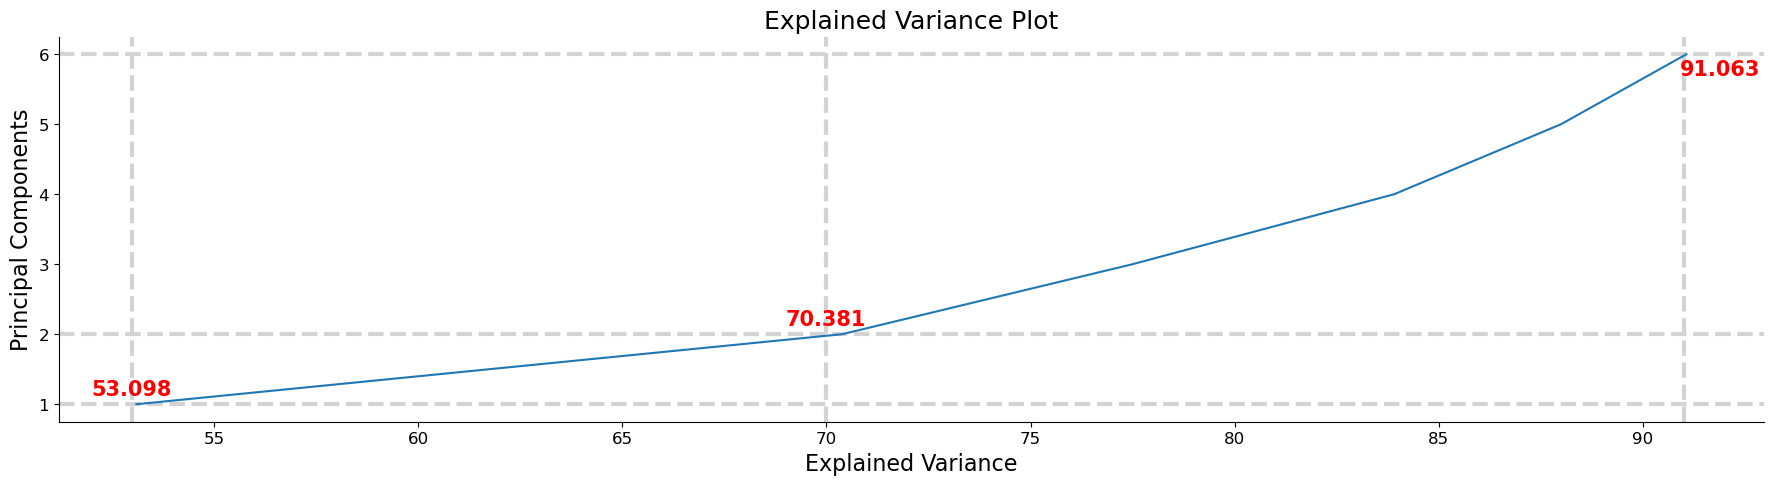

In [32]:
sns.lineplot(x=explained_variance,  y=range(1,len(explained_variance)+1))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#Add grey lines to better present the limits and the increament in the PC detection and selcetion
plt.axhline(1, linestyle='--', lw=3, zorder=1, color='lightgray')
plt.axhline(2, linestyle='--', lw=3, zorder=1, color='lightgray')
plt.axhline(6, linestyle='--', lw=3, zorder=1, color='lightgray')
plt.axvline(53, linestyle='--', lw=3, zorder=1, color='lightgray')
plt.axvline(70, linestyle='--', lw=3, zorder=1, color='lightgray')
plt.axvline(91, linestyle='--', lw=3, zorder=1, color='lightgray')


#Add in bold the initial explained variance, mid and higher that will be used
plt.annotate(f'70.381', (69, 2.12), fontsize=15, fontweight='bold', color='red')
plt.annotate(f'53.098', (52, 1.12), fontsize=15,  fontweight='bold', color='red')
plt.annotate(f'91.063', (90.9, 5.7), fontsize=15, fontweight='bold', color='red')

plt.title('Explained Variance Plot', fontsize=18)
plt.xlabel('Explained Variance', fontsize=16)
plt.ylabel('Principal Components',fontsize=16)
plt.show()

Linear transformation is a mathematical operation on a vector or matrix that preserves the set of linear combinations of its elements. It is a fundamental operation in machine learning and is used to transform data into a more useful form.

It can be used to reduce the dimensionality of datasets, to normalize features, or to reduce the complexity of a model. Linear transformation is also used to project data onto a lower-dimensional space, thereby allowing for more efficient learning.

In [33]:
# function to convert column of matrix to 1D vector: 
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)


In [34]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

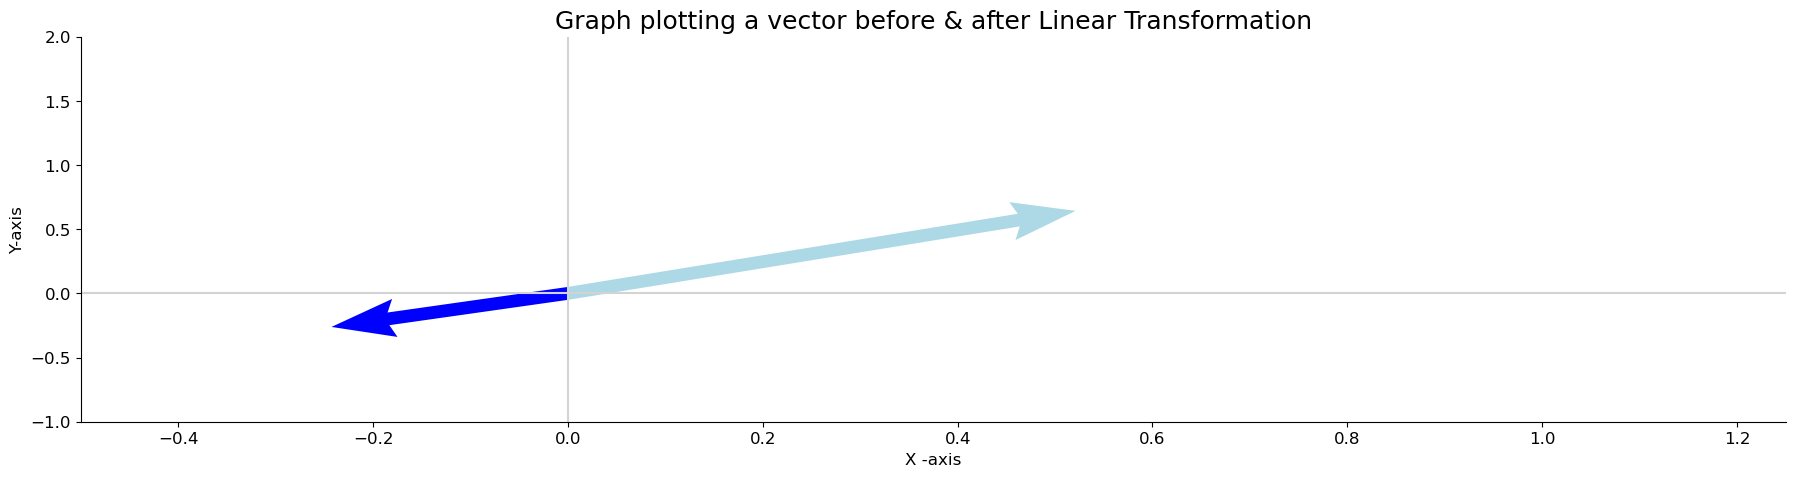

In [35]:
plot_vectors([ vectorfy(np.matrix(df_inputs),0),  eigen_vectors[0]], ['lightblue','blue'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Graph plotting a vector before & after Linear Transformation', fontsize=18)
plt.xlabel('X -axis')
plt.ylabel('Y-axis')
plt.xlim(-0.5, 1.25)
_ = plt.ylim(-1, 2)

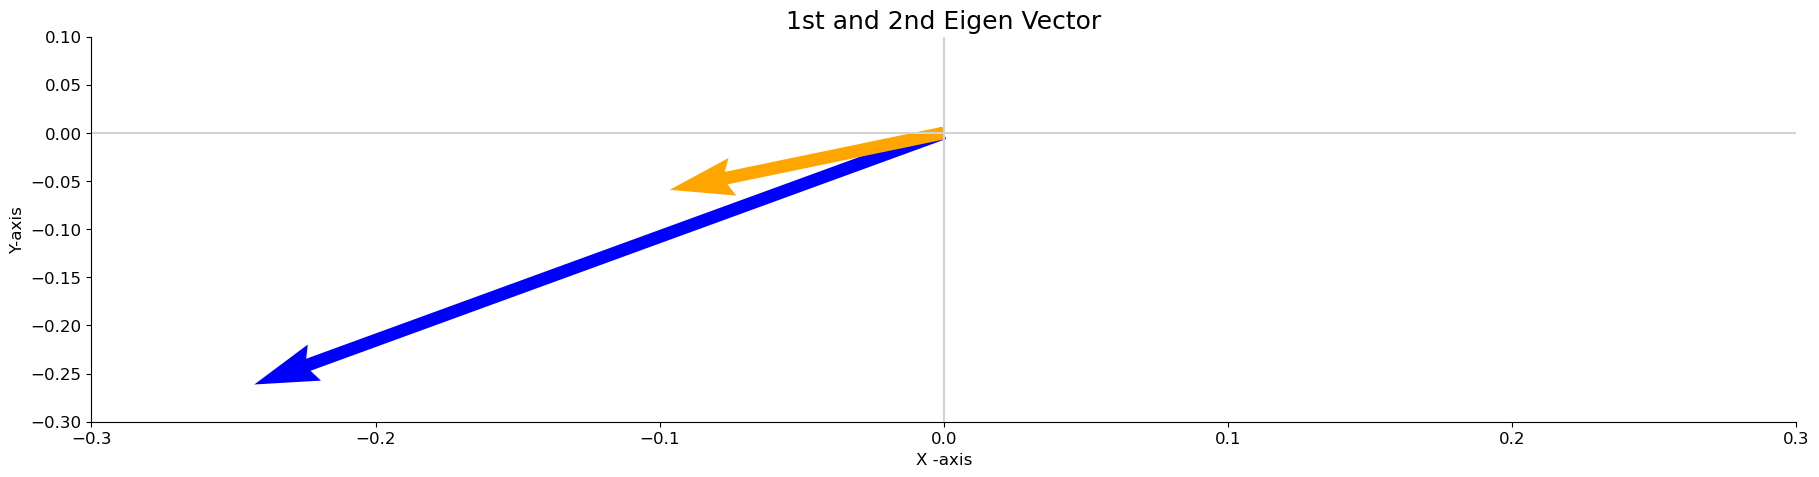

In [36]:
plot_vectors([eigen_vectors[0], eigen_vectors[1]] , ['blue', 'orange'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('1st and 2nd Eigen Vector', fontsize=18)
plt.xlabel('X -axis')
plt.ylabel('Y-axis')
plt.xlim(-0.3, 0.3)
_ = plt.ylim(-0.3, 0.1)


The vector shown in lightblue is from before the transformation and the one in darker color is the one that's received after the transformation.

For further calculation, from all the  𝐸𝑖𝑔𝑒𝑛 𝑉𝑒𝑐𝑡𝑜𝑟𝑠
  we have thus received after the Linear Transformation, we have selected the one that have the tallest vectors which means the variance on the unit vector will be the highest.

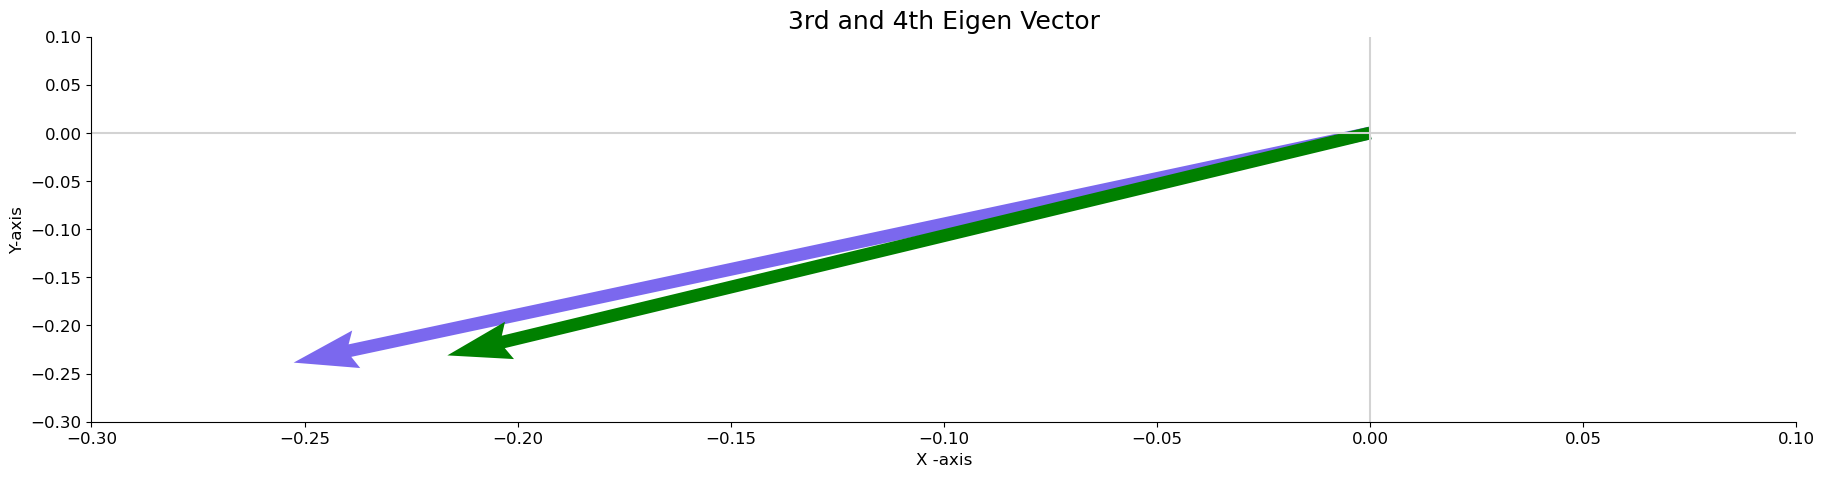

In [37]:
plot_vectors([eigen_vectors[2], eigen_vectors[3]] , ['mediumslateblue', 'green'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('3rd and 4th Eigen Vector', fontsize=18)
plt.xlabel('X -axis')
plt.ylabel('Y-axis')
plt.xlim(-0.3, 0.1)
_ = plt.ylim(-0.3, 0.1)

### Tranforming all data
We have chosen 7 components since they explain the 90% of the explained variance in our data. The transpose is being done to enable the matrix multiplication. The shape of the dataframe is 569 by 30 whereas the shape Principal Components Array is 7 by 30 and to be able to multiply the matrices, the length of the rows of one matrix should be equal to the length of the columns of another matrix

In [38]:
pc = eigen_vectors[0:6]
print('The Original PC array')
pc[0]

The Original PC array


array([-2.42675774e-01, -2.61316697e-01, -5.95222384e-02,  3.94334569e-02,
       -5.88423544e-04,  2.07022394e-02,  2.42488690e-03, -4.38845905e-02,
        9.75085975e-02,  2.22769562e-01, -8.31524671e-02, -1.19734434e-01,
       -3.89565406e-02, -1.07972318e-01,  1.93030259e-01, -7.30164853e-02,
        2.97307938e-01, -1.47147813e-02,  3.38169231e-02, -4.54114194e-02,
        6.29772186e-02, -1.38267325e-01, -7.05072198e-01, -1.96766318e-01,
       -1.47132741e-01, -1.30574879e-01,  1.54107718e-01, -9.73681525e-02,
        5.86339157e-02, -5.57071438e-02])

In [39]:
print('The Transpose of PC array')
pc.T[0]

The Transpose of PC array


array([-0.24267577, -0.09647861, -0.25255017, -0.21649453, -0.10969462,
       -0.2403976 ])

In [40]:
transformed_df = np.dot(df.iloc[:,0:30],pc.T)
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2','PC3', 'PC4', 'PC5', 'PC6'])
new_df['Target'] = df['target'].values
new_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,Target
0,-520.188331,68.360773,-583.967183,965.938950,-125.514544,107.218277,0
1,-472.002225,63.725168,-560.812348,962.732088,-92.886364,112.571279,0
2,-426.933982,62.458621,-484.250303,842.866511,-99.523851,102.491067,0
3,-184.853863,44.017546,-136.342174,277.754370,-30.916892,38.412925,0
4,-394.181870,60.226364,-429.655025,790.215736,-105.788586,95.896057,0


In [41]:
new_df['Target'] = new_df['Target'].astype('int')

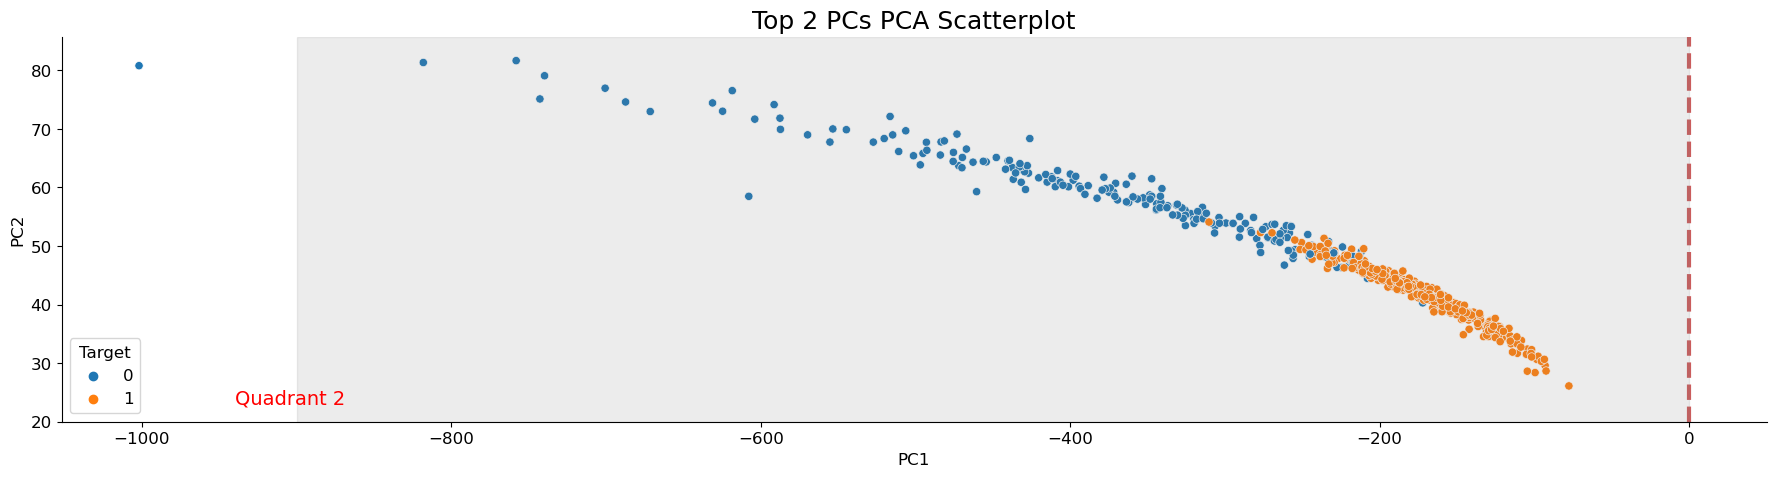

In [42]:
sns.scatterplot(data= new_df,
                 x=new_df['PC1'],
                 y=new_df['PC2'],
               hue=new_df['Target'])
plt.title('Top 2 PCs PCA Scatterplot', fontsize=18)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.axhline(0, linestyle='--', lw=3, zorder=1, color='lightgray')
plt.axvline(0, linestyle='--', lw=3, zorder=1, color='indianred')
plt.axvspan(0,-900, alpha=0.15, zorder=1, color='gray')

plt.annotate(f'Quadrant 2', (-940, 23), fontsize=14,color='red')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.ylim(20)
plt.show()


### Handling Class Imbalance

To make the model pay more attention to the classes where there are fewer occurence of a given class in the entire data, class weights can be used. Almost all the classifiers will have the argument which will essentially take a dictionary to be passed when training the model.

The argument penalizes mistakes in samples of  𝑐𝑙𝑎𝑠𝑠[𝑖]
  with class_weight[i] instead of 1. So higher class-weight means you want to put more emphasis on a class. From what you say it seems class 0 is 19 times more frequent than class 1. So you should increase the class_weight of class 1 relative to class 0, say {0:.1, 1:.9}. If the class_weight doesn't sum to 1, it will basically change the regularization parameter.

In the code cell just below, we are creating just a dictionary containing the classes and the class weights that will be used while training a model.

In [45]:
#Creating a dictionary using a for loop for class weights
class_weight = {}

for i in range(len(np.unique(new_df))):
    #for x in [np.around((len(targets[targets==i]))/(targets.shape[0]),4)]     #Actual Weights
    
    for x in [1/len(np.unique(new_df))]:               #Since we want equal weights to be given to classes
        class_weight[i] = x
        
print('=== CLASS WEIGHT ===')
print(class_weight)


=== CLASS WEIGHT ===
{0: 0.0002927400468384075, 1: 0.0002927400468384075, 2: 0.0002927400468384075, 3: 0.0002927400468384075, 4: 0.0002927400468384075, 5: 0.0002927400468384075, 6: 0.0002927400468384075, 7: 0.0002927400468384075, 8: 0.0002927400468384075, 9: 0.0002927400468384075, 10: 0.0002927400468384075, 11: 0.0002927400468384075, 12: 0.0002927400468384075, 13: 0.0002927400468384075, 14: 0.0002927400468384075, 15: 0.0002927400468384075, 16: 0.0002927400468384075, 17: 0.0002927400468384075, 18: 0.0002927400468384075, 19: 0.0002927400468384075, 20: 0.0002927400468384075, 21: 0.0002927400468384075, 22: 0.0002927400468384075, 23: 0.0002927400468384075, 24: 0.0002927400468384075, 25: 0.0002927400468384075, 26: 0.0002927400468384075, 27: 0.0002927400468384075, 28: 0.0002927400468384075, 29: 0.0002927400468384075, 30: 0.0002927400468384075, 31: 0.0002927400468384075, 32: 0.0002927400468384075, 33: 0.0002927400468384075, 34: 0.0002927400468384075, 35: 0.0002927400468384075, 36: 0.0002927400

### Splitting and Training Models

Splitting Data & Training Models
Train test split is a technique used in machine learning to split a dataset into two subsets: a training set and a testing set. The training set is used to build and train a model, while the testing set is used to evaluate the performance of the trained model.

We start the process of training our data now that we are done with preprocessing of the data. Lets go ahead and split the data into 2 splits i.e. training and validation data. Training data will be used to train our model and we will validate the score on the validation data.

In [46]:
#Splitting the data into train and validation set
train_inputs, val_inputs, train_targets, val_targets = train_test_split(new_df, 
                                                                        df_targets, 
                                                                        test_size=0.25, 
                                                                        random_state=42)
print('X_train Shape -',train_inputs.shape,',', 'y_train Shape -', train_targets.shape)
print('X_test shape -', val_inputs.shape,',','y_test shape -', val_targets.shape)

X_train Shape - (426, 7) , y_train Shape - (426,)
X_test shape - (143, 7) , y_test shape - (143,)


We have used the class_weights parameter while defining the models in the cell below.

Try different algorithms to evaluate the best machine learning model that gives the best classification and accurate predictions

In [47]:
names = ['Logistic Regression', "KNN", "Linear SVM","Gradient Boosting", "Decision Tree", "Random_Forest"]
classifiers = [
    LogisticRegression(solver='liblinear', class_weight=class_weight, random_state=42),
    KNeighborsClassifier(n_neighbors=3, weights= 'distance'),
    SVC(kernel="linear", C=0.025, class_weight=class_weight, random_state=42),
    GradientBoostingClassifier(n_estimators=100, random_state=42),
    DecisionTreeClassifier(max_depth=5, class_weight=class_weight, random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=100, class_weight=class_weight, random_state=42)]

In [178]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(train_inputs, train_targets)
    score = clf.score(val_inputs, val_targets)
    scores.append(score)
scores_df = pd.DataFrame()
scores_df['name'] = names
scores_df['score'] = np.around(scores,5)
scores_df.sort_values('score', ascending= False)

,name,score
0,Logistic Regression,1.00000
3,Gradient Boosting,1.00000
4,Decision Tree,1.00000
5,Random_Forest,1.00000
2,Linear SVM,0.99301
1,KNN,0.93706


### Models' Accuracy and Performance

When it comes to checking the model accuracy, you can use the below techniques to see how well the model is performing.

1. Confusion Matrix: A confusion matrix is a table that is used to evaluate the performance of a classification model. It is a table of the true positive, true negative, false positive, and false negative values for a classification problem. It is also used to calculate various metrics such as precision, recall, accuracy, and f1-score.

2. Accuracy Score: The accuracy score is the ratio of correctly predicted observations to the total observations. It is a primary evaluation metric for classification problems.

3. F1 Score: F1 score is the harmonic mean of precision and recall. It is usually used to compare two or more classifiers.

4. ROC Curve: A ROC curve is a graphical representation of the performance of a classification model. It is a plot of the true positive rate against the false positive rate. The higher the area under the curve, the better the model is at predicting the positive class.

In [48]:
#Initiating the model
model = LogisticRegression(solver='liblinear', random_state=42,  n_jobs=-1, class_weight=class_weight)

#fitting the model
model.fit(train_inputs, train_targets)

#making the predictions
LRtrain_preds = model.predict(train_inputs)

#Creating the confusion matrix
confusionmatrix = np.around(confusion_matrix(train_targets, LRtrain_preds, normalize='true'),4)

#Plotting the Confusion Matrix
fig = px.imshow(confusionmatrix, template='ggplot2',text_auto=True, aspect="auto", 
                labels=dict(x="Predicted Label", y="Correct Label", color='Value'))
fig.update_xaxes(side="bottom")

fig_widget = go.FigureWidget(fig)
fig_widget

FigureWidget({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'Predicted Label: %{x}<br>Correct Label: %{y}<br>Value: %{z}<extra></extra>',
              'name': '0',
              'texttemplate': '%{z}',
              'type': 'heatmap',
              'uid': 'bbe28557-9566-4118-836b-90879e93151b',
              'xaxis': 'x',
              'yaxis': 'y',
              'z': array([[0.7911, 0.2089],
                          [0.0373, 0.9627]])}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'Value'}},
                             'colorscale': [[0.0, 'rgb(20,44,66)'], [1.0,
                                            'rgb(90,179,244)']]},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'side': 'bottom', 'title': {'text': 'Predicted Label'}},
               'yaxis': {'anchor': 'x',
                         'autorange': 'reversed',
                         'domain': [0.0

In [50]:
val_targets.shape

#print('X_train Shape -',train_inputs.shape,',', 'y_train Shape -', train_targets.shape)
#print('X_test shape -', val_inputs.shape,',','y_test shape -', val_targets.shape)

(143,)

In [51]:
LRtrain_preds.shape

(426,)

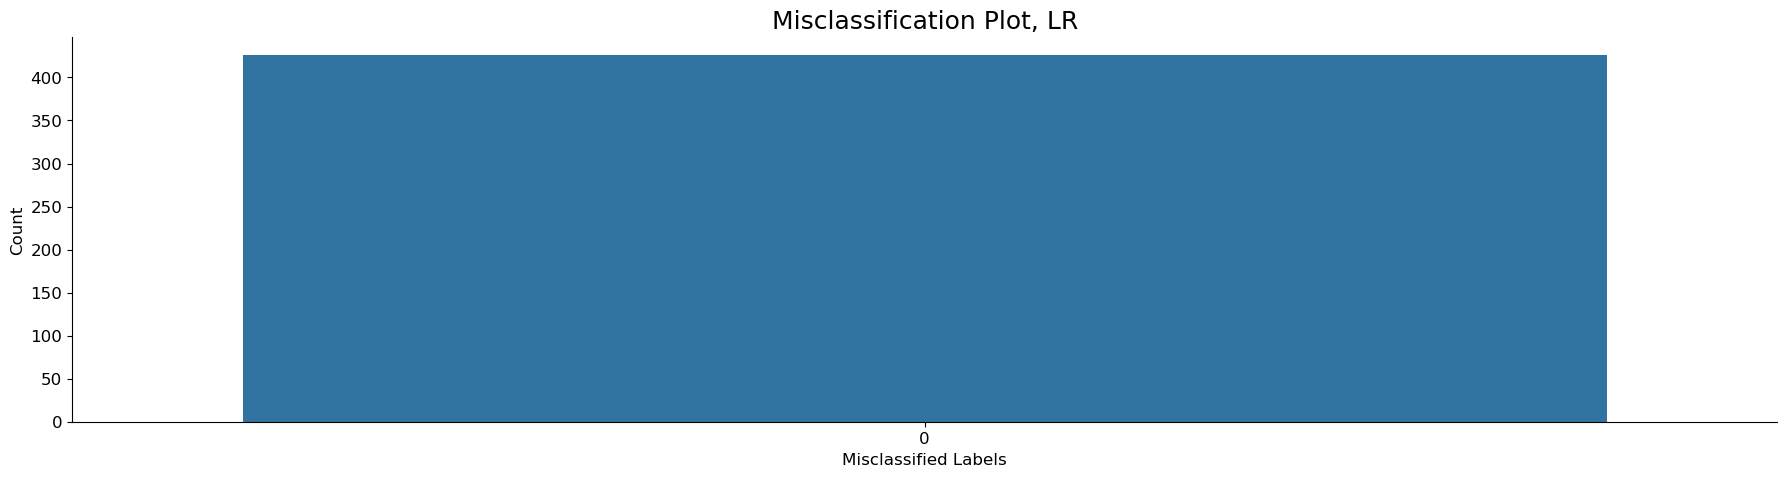

In [52]:
sns.countplot([train_targets!=LRtrain_preds])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("Misclassification Plot, LR", fontsize=18)
plt.xlabel('Misclassified Labels')
plt.ylabel('Count')
plt.show()

In [53]:
# Logistic Regression Model
print(classification_report(train_targets, LRtrain_preds))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85       158
           1       0.89      0.96      0.92       268

    accuracy                           0.90       426
   macro avg       0.91      0.88      0.89       426
weighted avg       0.90      0.90      0.90       426



In [54]:
print(len(train_targets[train_targets != LRtrain_preds]),'cases out of', len(train_targets), 
      'cases are being misclassified by the Logistic Regression model which gives us an error rate of', 
      np.around((len(train_targets[train_targets != LRtrain_preds])/len(train_targets)*100),5))


43 cases out of 426 cases are being misclassified by the Logistic Regression model which gives us an error rate of 10.0939


**Linear Discriminant Analysis (LDA)** is a supervised learning algorithm used to classify a data set into multiple classes. It is a linear transformation technique which seeks to find a set of linear combinations of variables that best separate classes of data. LDA is a classification technique that looks at the data set and finds a linear combination of variables that will best separate the data. It is often used to reduce the number of variables in a data set while still retaining the important information for classification.

The basic idea behind LDA is to maximize the ratio of the between-class variance to the within-class variance. The goal of LDA is to find a linear combination of variables that separates the classes as much as possible. This is accomplished by finding the direction that maximizes the ratio of the between-class variance to the within-class variance.

The first step in LDA is to calculate the means and the covariance matrix of the data set. The means are the average values of each variable across all the classes. The covariance matrix is a measure of the variance between the variables. Once the means and the covariance matrix are calculated, a linear combination of the variables is calculated that maximizes the ratio of between-class variance to within

**Why LDA?**

- LDA is particularly useful when dealing with a high-dimensional dataset as it provides a way to reduce the number of dimensions while preserving as much of the variation in the original data as possible.
- It also helps identify the most important variables in a dataset, which is useful for further analysis. LDA can be used for exploratory data analysis and for predictive modeling.
- LDA is also used in face detection algorithms. In Fisherfaces, LDA is used to extract useful data from different faces. Coupled with eigenfaces, it produces effective results.


**Drawbacks of Linear Discriminant Analysis (LDA)**

1. It assumes that the data is normally distributed, which may not always be the case in real-world data sets.
2. It assumes that the variables are statistically independent, which is also not always the case in real-world data sets.
3. It is sensitive to outliers, which can affect the accuracy of the model.
4. It can only be used for two-class classification problems, and does not work well with multi-class problems.
5. It is not suitable for data sets with a large number of features, as it can become computationally expensive.


**Difference between Linear Discriminant Analysis and Principal Component Analysis**

Linear Discriminant Analysis (LDA) is a supervised learning technique used to classify objects into categories based on the values of one or more predictor variables. It finds the linear combination of features that best separates classes of data, such as in a binary classification problem.

Principal Component Analysis (PCA) is an unsupervised technique used to reduce the dimensionality of data. It is a way of extracting important features from a large set of variables and combining them into a reduced set of features that represent most of the variability in the data. The components extracted by PCA are uncorrelated and ordered by how much of the total variance they explain. PCA is used to reduce the complexity of a data set, whereas LDA is used to classify objects into different classes.

In [55]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [56]:
# Create an instance of LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
# Fit the model to the data and transform the data using the fit
X_lda = lda.fit_transform(X, y)
# Print the shape of the original data and the transformed data
print("Original Data shape:",X.shape, "\nModified Data shape:", X_lda.shape)


Original Data shape: (569, 30) 
Modified Data shape: (569, 1)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)


In [58]:
lda.fit(X_train, y_train)


LinearDiscriminantAnalysis()

In [59]:
#LDA Predictions and Performance
LDAtrain_preds = lda.predict(X_train)
confusionmatrix = np.around(confusion_matrix(y_train, LDAtrain_preds, normalize='true'),3)

#Plotting the Confusion Matrix
fig = px.imshow(confusionmatrix, 
                template='simple_white',
                text_auto=True, 
                aspect="auto", 
                labels=dict(x="Predicted Label", y="Correct Label", color='Value'))
fig.update_xaxes(side="bottom")
fig_widget = go.FigureWidget(fig)
fig_widget

FigureWidget({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'Predicted Label: %{x}<br>Correct Label: %{y}<br>Value: %{z}<extra></extra>',
              'name': '0',
              'texttemplate': '%{z}',
              'type': 'heatmap',
              'uid': '8e898d05-8362-45f3-ba3a-78045393d2e4',
              'xaxis': 'x',
              'yaxis': 'y',
              'z': array([[0.911, 0.089],
                          [0.003, 0.997]])}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'Value'}},
                             'colorscale': [[0.0, '#440154'], [0.1111111111111111,
                                            '#482878'], [0.2222222222222222,
                                            '#3e4989'], [0.3333333333333333,
                                            '#31688e'], [0.4444444444444444,
                                            '#26828e'], [0.5555555555555556,
                                            '#1f9e89'], [0.666666666666

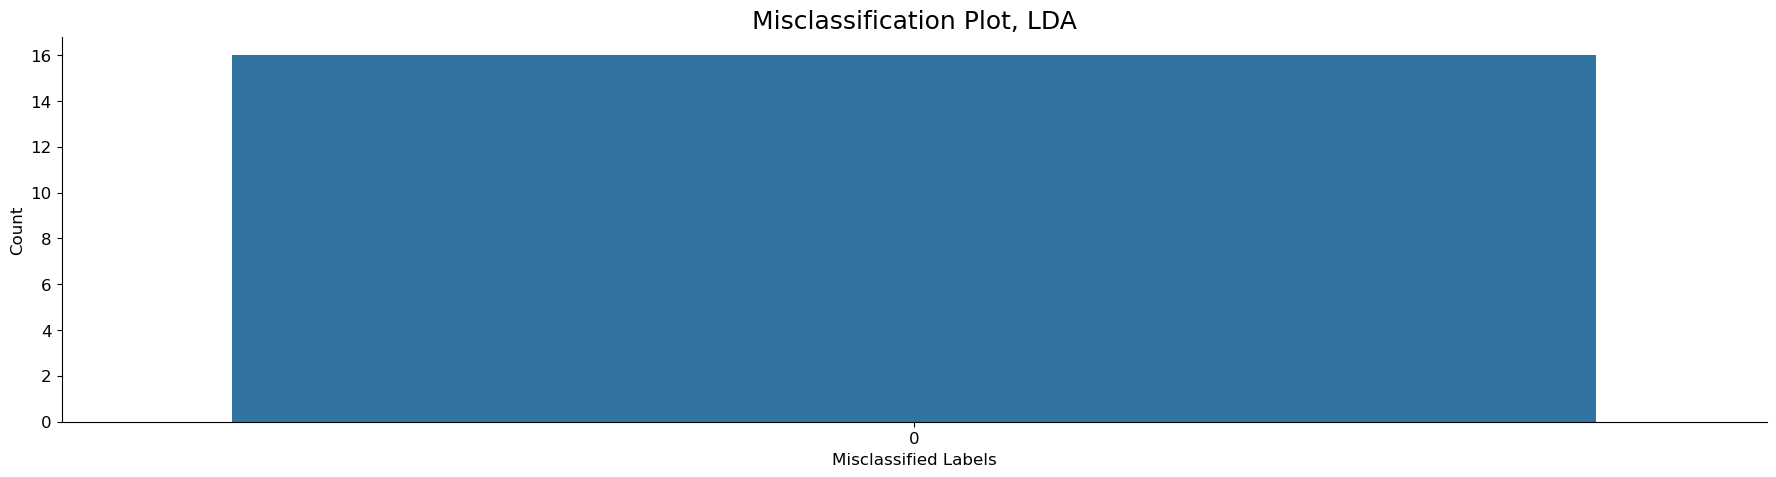

In [60]:
sns.countplot(y_train[y_train!=LDAtrain_preds])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("Misclassification Plot, LDA", fontsize=18)
plt.xlabel('Misclassified Labels')
plt.ylabel('Count')
plt.show()

In [61]:
print(len(y_train[y_train!=LDAtrain_preds]),'cases out of', len(y_train), 
      'cases are being misclassified by the LDA which gives us an error rate of', 
      np.around((len(y_train[y_train!=LDAtrain_preds])/len(y_train)*100),3))

16 cases out of 455 cases are being misclassified by the LDA which gives us an error rate of 3.516


There are bunch of models that we can use however with Logistic Regression its easier to explain to the relevant stakeholders, especially when we are in a setting where the stakeholder is a patient hanging between life & death.

**Summary**

1. 357 Benign Cases and 212 Malignant breast cancer cases. Compactness Mean is more in the Malignant Cases as compared to the Benign Cases.
2. PCA is a great way to shift from high dimensionality to low dimensionality. If we have more features than observations than we run the risk of massively overfitting our model — this would generally result in terrible out of sample performance.
3. You probably don't need undersampling or oversampling. What you can do is create the class weight dictionary and ensure each class weightage comes out the same and then this parameter can be given to the model to make better predictions for cases where there is a lass imbalance.
4. Linear Discriminant Analysis (LDA) can be applied to multiclass classification problems however it fails to create a new axis that makes the classes linearly seperable.